# Práctica Deep Learning - Marcos Salafranca Arnau
---

Cargamos los datos necesarios

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None) # para mostrar todas las filas
pd.set_option('display.max_columns', None) # para mostrar todas las columnas

In [ ]:
# Nos descargamos el dataset de OpenDataSoft
!wget -O "airbnb-listings.csv" "https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B"


--2023-07-15 16:01:17--  https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B
Resolving public.opendatasoft.com (public.opendatasoft.com)... 34.248.20.69, 34.249.199.226
Connecting to public.opendatasoft.com (public.opendatasoft.com)|34.248.20.69|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/csv]
Saving to: ‘airbnb-listings.csv’

airbnb-listings.csv     [                 <=>]  54.31M  1.37MB/s    in 2m 22s  

2023-07-15 16:04:13 (392 KB/s) - ‘airbnb-listings.csv’ saved [56950929]



In [6]:
# montamos GDrive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Leemos el dataset con pandas
import cv2
import imageio.v3 as io

from tqdm import tqdm
from typing import Optional, Union
# full_df =  pd.read_csv("airbnb-listings.csv", sep = ';')
full_df =  pd.read_csv("drive/MyDrive/DeepLearning/airbnb-listings.csv", sep = ';')

full_df = full_df.dropna(subset=['Price'])
full_df.head(5).T

,0,1,2,3,4
ID,15141125,9470166,17444981,3284565,499911
Listing Url,https://www.airbnb.com/rooms/15141125,https://www.airbnb.com/rooms/9470166,https://www.airbnb.com/rooms/17444981,https://www.airbnb.com/rooms/3284565,https://www.airbnb.com/rooms/499911
Scrape ID,20170407214119,20170407214119,20170407214119,20170407214119,20170407214119
Last Scraped,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08
Name,Panoramic charming studio!,Comfortable penthouse in the center,Cosy Apartment SOL/LA LATINA,Alquiler Estudio Nuevo Madrid,2 bedroom apartment downtown Madrid
Summary,"Charming bright and cosy studio in ""El Rastro""...","In the center, recently remodeled, comfortable...",Nice apartment near Sol and La Latina. Perfect...,"Alquilo estudio en el centro de Madrid , total...",NaN
Space,It's a bright and cosy studio located in the h...,Quiet and comfortable space where you can rela...,Is a really cosy apartment with the best locat...,NaN,Bright and airy apartment in Central Madrid re...
Description,"Charming bright and cosy studio in ""El Rastro""...","In the center, recently remodeled, comfortable...",Nice apartment near Sol and La Latina. Perfect...,"Alquilo estudio en el centro de Madrid , total...",Bright and airy apartment in Central Madrid re...
Experiences Offered,none,none,none,none,none
Neighborhood Overview,The studio is located in the remarkable neighb...,It belongs to the district center of Madrid wh...,"La Latina is well known by El Rastro, the most...",NaN,NaN


In [ ]:
# vamos a ver de cuantos registros disponemos y de cuantas variables
full_df.shape

(14763, 89)

In [ ]:
# ¿De qué variables disponemos?
full_df.columns

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

Se ve que gran parte de los datos no aportan información relevante. Se van a eliminar de inmediato las columnas:




In [ ]:
# Hacemos un drop de todas las columnas que OBVIAMENTE no aportan información relevante
not_useful_columns = [
    'ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Medium Url',
    'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL', 'Host Name',
    'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood', 'Weekly Price',
    'Monthly Price', 'Calendar Updated', 'Calendar last Scraped', 'First Review',
    'Last Review', 'Reviews per Month', 'Geolocation', 'Calculated host listings count',
    'Host Listings Count', 'Host Total Listings Count', 'Security Deposit', 'Cleaning Fee',
    'Name', 'Summary', 'Space', 'Description','Neighborhood Overview', 'Notes', 'Transit',
    'Access', 'Interaction', 'House Rules','Host Location', 'Host About', 'Host Since'
]

full_df.drop(not_useful_columns, axis=1, inplace=True)



In [ ]:
full_df.columns

Index(['Experiences Offered', 'Thumbnail Url', 'Host Response Time',
       'Host Response Rate', 'Host Acceptance Rate', 'Host Verifications',
       'Street', 'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price',
       'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights',
       'Has Availability', 'Availability 30', 'Availability 60',
       'Availability 90', 'Availability 365', 'Number of Reviews',
       'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'License', 'Jurisdiction Names',
       'Cancellation Policy', 'Features'],
  

Se analiza el número de valores diferentes por columnas.

In [ ]:
full_df.apply(lambda x: len(x.unique()))

Experiences Offered                 5
Thumbnail Url                   11949
Host Response Time                  5
Host Response Rate                 71
Host Acceptance Rate               13
Host Verifications                207
Street                           1637
Neighbourhood                     388
Neighbourhood Cleansed            478
Neighbourhood Group Cleansed       50
City                              246
State                             102
Zipcode                           615
Market                             44
Smart Location                    256
Country Code                       18
Country                            18
Latitude                        14763
Longitude                       14763
Property Type                      22
Room Type                           3
Accommodates                       16
Bathrooms                          18
Bedrooms                           11
Beds                               17
Bed Type                            5
Amenities   

La variable Street no muestra realmente la calle; en muchas, simplemente es la ciudad y un código postal (variables que ya tienen su propia columna). Es una variable muy ruidosa y no categorizada.

Por otro lado, City, State, Market y Smart Location aportan la misma información, al igual que Country y Country Code y de forma similar a Neighbourhood y Zipcode. Nos quedamos con City y eliminamos las demás.


In [ ]:
full_df.drop(['Street', 'State', 'Market', 'Smart Location', 'Country', 'Zipcode'], axis=1, inplace=True)

Vamos a comprobar qué variables tienen muchos valores missing. Hay columnas en las que apenas hay datos. Los eliminamos.

In [ ]:

full_df.isnull().sum()

Experiences Offered                 0
Thumbnail Url                    2812
Host Response Time               1896
Host Response Rate               1896
Host Acceptance Rate            14724
Host Verifications                  5
Neighbourhood                    5224
Neighbourhood Cleansed              0
Neighbourhood Group Cleansed     1012
City                                6
Country Code                        0
Latitude                            0
Longitude                           0
Property Type                       0
Room Type                           0
Accommodates                        0
Bathrooms                          54
Bedrooms                           25
Beds                               48
Bed Type                            0
Amenities                         168
Square Feet                     14166
Price                               0
Guests Included                     0
Extra People                        0
Minimum Nights                      0
Maximum Nigh

In [ ]:
columns_many_missing = [
    'Host Acceptance Rate', 'Square Feet', 'Has Availability', 'License', 'Jurisdiction Names'
]

full_df.drop(columns_many_missing, axis=1, inplace=True)

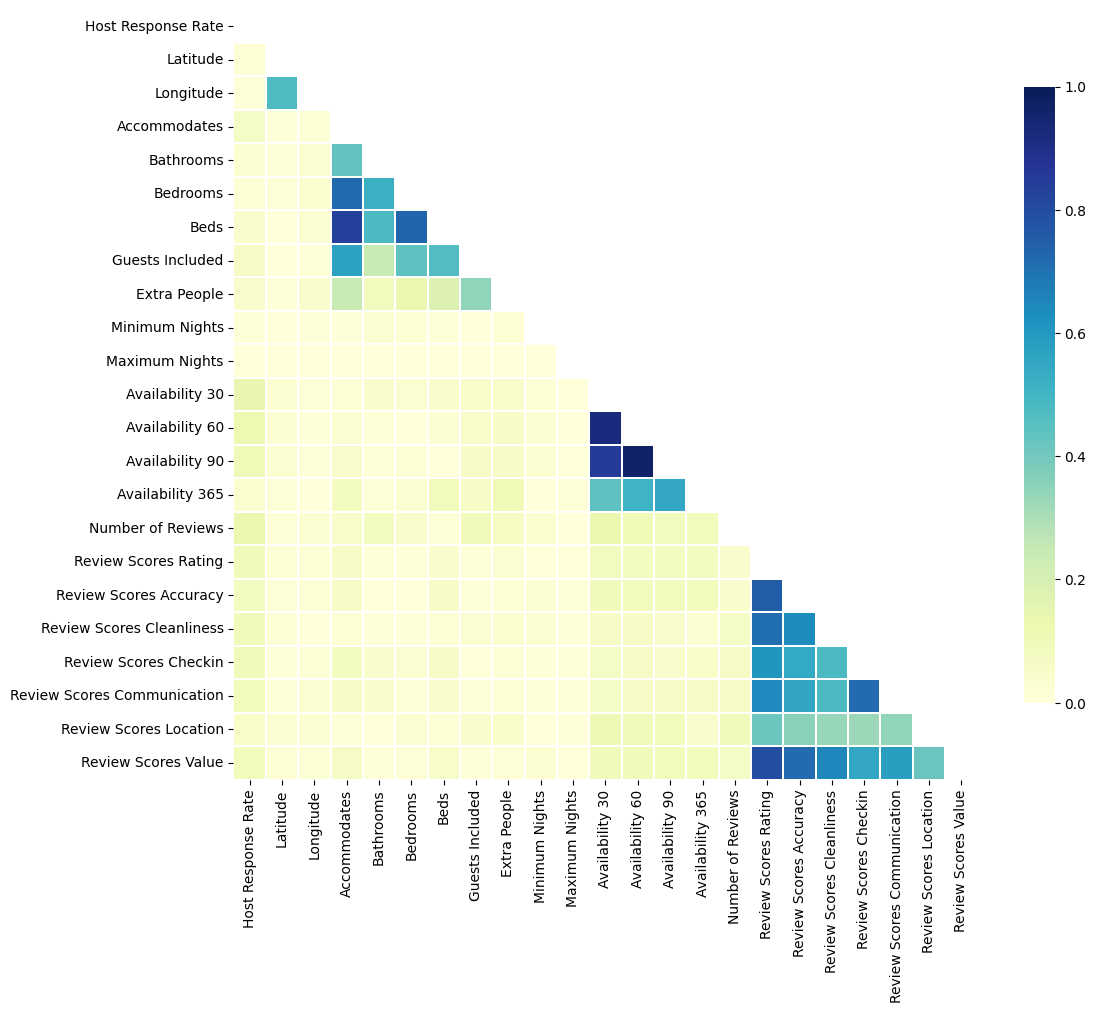

In [ ]:
# Comprobar las variables redundantes
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(full_df.drop(['Price'], axis=1).corr())
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

# puedo representar solo la parte inferior ya que es simétrica

Como hay mucha correlacion entre ellas las eliminamos

In [ ]:
reviews = full_df.loc[: , "Review Scores Rating":"Review Scores Value"]
full_df['Average Review'] = reviews.mean(axis=1)

full_df.drop(['Availability 30', 'Availability 60', 'Availability 365', 'Review Scores Rating',
         'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location', 'Review Scores Value'], axis=1, inplace=True)

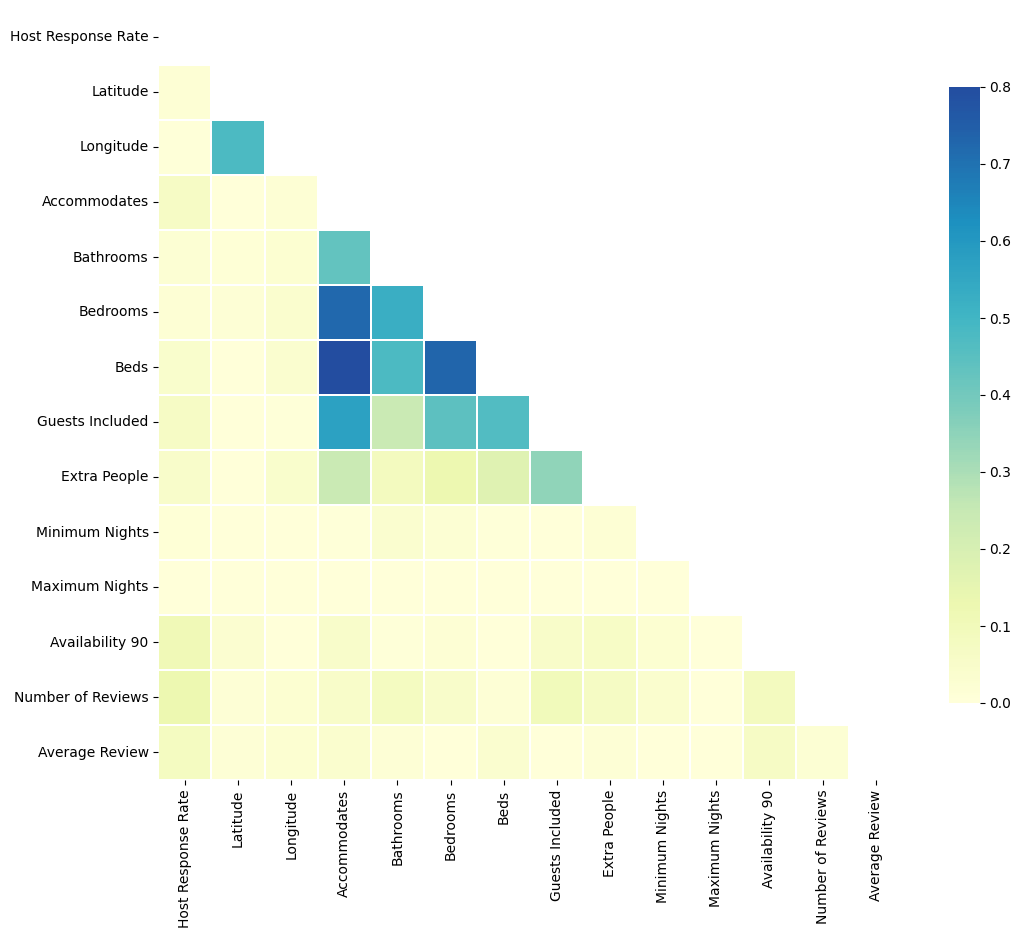

In [ ]:
# Compute the correlation matrix
corr = np.abs(full_df.drop(['Price'], axis=1).corr())
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=0.8, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

# La matriz de correlación tiene mejor pinta

In [ ]:
full_df.columns

Index(['Experiences Offered', 'Thumbnail Url', 'Host Response Time',
       'Host Response Rate', 'Host Verifications', 'Neighbourhood',
       'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'City',
       'Country Code', 'Latitude', 'Longitude', 'Property Type', 'Room Type',
       'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type',
       'Amenities', 'Price', 'Guests Included', 'Extra People',
       'Minimum Nights', 'Maximum Nights', 'Availability 90',
       'Number of Reviews', 'Cancellation Policy', 'Features',
       'Average Review'],
      dtype='object')

In [ ]:
# Después del análisis se ha conseguido
full_df.shape

(14763, 30)

In [ ]:
#Creo una nueva característica para  vecindarios y luego se  borran las columnas que hacen referencia
full_df["Final Neighbourhood"] = full_df["Neighbourhood Group Cleansed"].fillna(full_df["Neighbourhood Cleansed"])

In [ ]:
full_df.drop(["Neighbourhood", "Neighbourhood Group Cleansed", "Neighbourhood Cleansed"], axis=1, inplace=True)

In [ ]:
# Reemplazar valores NaN

full_df['Features'].fillna("", inplace=True)
full_df['Amenities'].fillna("", inplace=True)
full_df['Host Verifications'].fillna("", inplace=True)

full_df['Features'] = full_df['Features'].apply(lambda x: len(str(x).split(',')))
full_df['Amenities'] = full_df['Amenities'].apply(lambda x: len(str(x).split(',')))
full_df['Host Verifications'] = full_df['Host Verifications'].apply(lambda x: len(str(x).split(',')))

In [ ]:
full_df.columns

Index(['Experiences Offered', 'Thumbnail Url', 'Host Response Time',
       'Host Response Rate', 'Host Verifications', 'City', 'Country Code',
       'Latitude', 'Longitude', 'Property Type', 'Room Type', 'Accommodates',
       'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Amenities', 'Price',
       'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights',
       'Availability 90', 'Number of Reviews', 'Cancellation Policy',
       'Features', 'Average Review', 'Final Neighbourhood'],
      dtype='object')

In [ ]:
full_df.shape

(14763, 28)

In [ ]:
# Revisión de datos
list(full_df.select_dtypes(include=['object']).columns)

['Experiences Offered',
 'Thumbnail Url',
 'Host Response Time',
 'City',
 'Country Code',
 'Property Type',
 'Room Type',
 'Bed Type',
 'Cancellation Policy',
 'Final Neighbourhood']

In [ ]:
df_nn = full_df[list(full_df.select_dtypes(include=['object']).columns)]
df_nn.apply(lambda x: len(x.unique())) # valores diferentes

Experiences Offered        5
Thumbnail Url          11949
Host Response Time         5
City                     246
Country Code              18
Property Type             22
Room Type                  3
Bed Type                   5
Cancellation Policy        8
Final Neighbourhood      298
dtype: int64

In [ ]:
len(df_nn) - df_nn.count() # solo thumbnail y host response time tienen missing values

Experiences Offered       0
Thumbnail Url          2812
Host Response Time     1896
City                      6
Country Code              0
Property Type             0
Room Type                 0
Bed Type                  0
Cancellation Policy       0
Final Neighbourhood       0
dtype: int64

In [ ]:
df_nn["Host Response Time"].value_counts()

within an hour        7899
within a few hours    2870
within a day          1799
a few days or more     299
Name: Host Response Time, dtype: int64

Como no tenemos más datos, rellenamos con la opción más frecuente, en este caso within an hour, sobre el dataset original.

In [ ]:
full_df["Experiences Offered"].value_counts()

none        14746
business        8
social          3
family          3
romantic        3
Name: Experiences Offered, dtype: int64

In [ ]:
# Experiences Offered no aporta por eso se elimina
full_df.drop(['Experiences Offered'], axis=1, inplace=True)

In [ ]:
# Qué columnas quedan?
print(full_df.columns)
print(full_df.shape)

Index(['Thumbnail Url', 'Host Response Time', 'Host Response Rate',
       'Host Verifications', 'City', 'Country Code', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Price', 'Guests Included',
       'Extra People', 'Minimum Nights', 'Maximum Nights', 'Availability 90',
       'Number of Reviews', 'Cancellation Policy', 'Features',
       'Average Review', 'Final Neighbourhood'],
      dtype='object')
(14763, 27)


Carga de Imágenes

In [ ]:
def download_images(paths: list,
                    canvas: tuple = (224, 224),
                    nb_channels: int = 3,
                    max_imgs: Optional[int] = None
                    ) -> tuple:
  """ Download a list of images from url adresses, converting them to a specific
  canvas size.

  Args:
    paths: Paths or url adresses from which to load images.
    canvas: Desired image width and height.
    nb_channels: Channels in images (1 for B/W, 3 for RGB).
    max_imgs: Upper threshold in the number of images to download.

  Return:
    a tuple of:
      - image values
      - indices within the paths that were successfull.

  """
  n_images = len(paths) if not max_imgs else max_imgs
  images = np.zeros((n_images, canvas[0], canvas[1], nb_channels),
                       dtype=np.uint8)
  downloaded_idxs = []

  for i_img, url in enumerate(tqdm(paths, total=n_images)):
    if i_img >= n_images:
      break
    try:
        img = io.imread(url)
        img = cv2.resize(img, (canvas[0], canvas[1]))
        downloaded_idxs.append(i_img)
        images[i_img] = img
    except (IOError, ValueError) as e:  # Unavailable url / conversion error
        pass
  return images[downloaded_idxs], downloaded_idxs

In [ ]:
images, idxs = download_images(full_df['Thumbnail Url'], max_imgs=3000)
images = images.astype("float32") / 255.
images.shape

100%|██████████| 3000/3000 [10:00<00:00,  5.00it/s]


(1910, 224, 224, 3)

In [ ]:
images.shape

(1910, 224, 224, 3)

In [ ]:
# Filtrado acorde en los demas datos
full_df = full_df.iloc[idxs]


In [ ]:
# guardamos las imágenes (y yo os recomiendo que os lo guardéis en GDrive para evitar tener que repetir esto)
np.save('images.npy', images)
full_df.to_csv('full_df_primer.csv', sep=';', index=False)

In [ ]:
# almacenamos las imagenes en nuestro drive
'''!cp images.npy "/content/drive/My Drive/DeepLearning/images.npy"
!cp full_df_primer.csv "/content/drive/My Drive/DeepLearning/full_df_primer.csv"


!ls -lah images* filtered*  # Comprobación'''

ls: cannot access 'filtered*': No such file or directory
-rw-r--r-- 1 root root 1.1G Jul 16 14:35  images.npy


In [7]:
# Se carga el dataset con el mismo numero con el mismo munero de imagenes, Es la copia que se ha guardado antes. Ademas de la carga de las imagenes que se han descargado

full_df = pd.read_csv('drive/MyDrive/DeepLearning/full_df_primer.csv', sep=';')
images = np.load("drive/MyDrive/DeepLearning//images.npy")
print(full_df.shape)

(1910, 27)


In [8]:
print(images.shape)

(1910, 224, 224, 3)


In [9]:
# Obtener las etiquetas de regresion
y_reg = full_df['Price']
print(y_reg.shape)

(1910,)


<Axes: >

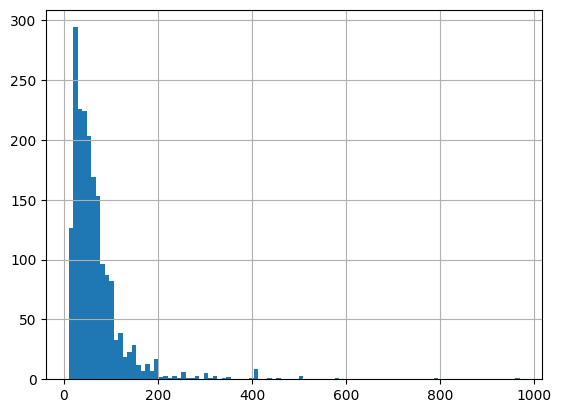

In [10]:
full_df['Price'].hist(bins=100)

In [11]:
full_df['Price'].describe()

count    1910.000000
mean       67.123037
std        64.115108
min        10.000000
25%        30.000000
50%        50.000000
75%        80.000000
max       969.000000
Name: Price, dtype: float64

In [12]:
from keras.utils import to_categorical

y_class = []
for y in full_df['Price']:
  if y <= 32:
    y_class.append(0) # Rango más barato
  elif 32 < y <= 55:
    y_class.append(1) # Rango intermedio
  else:
    y_class.append(2)
y_class = to_categorical(y_class, num_classes=3)

# Ahora la tenemos categorizada la y_class

## Normalización de etiquetas de 0-1

In [21]:
full_df['Average Review'] = full_df['Average Review'].fillna(full_df['Average Review'].mean())

In [22]:
full_df['Host Response Rate'] = full_df['Host Response Rate'].fillna(full_df['Host Response Rate'].mean())

In [23]:
full_df['Bedrooms'] = full_df['Bedrooms'].fillna(full_df['Bedrooms'].mean())

In [24]:
print(f'El dataframe tiene un total de {len(full_df)} filas.')
len(full_df) - full_df.count() # vemos cuántos valores NaN hay por columna

# full_df.isnull().any() # vemos qué columnas tienen valores NaN

El dataframe tiene un total de 1910 filas.


Thumbnail Url            0
Host Response Time     248
Host Response Rate       0
Host Verifications       0
City                     1
Country Code             0
Latitude                 0
Longitude                0
Property Type            0
Room Type                0
Accommodates             0
Bathrooms                4
Bedrooms                 0
Beds                     6
Bed Type                 0
Amenities                0
Price                    0
Guests Included          0
Extra People             0
Minimum Nights           0
Maximum Nights           0
Availability 90          0
Number of Reviews        0
Cancellation Policy      0
Features                 0
Average Review           0
Final Neighbourhood      0
dtype: int64

In [25]:
# One Hot Encoding CHECK
list(full_df.select_dtypes(include=['object']).columns)

['Thumbnail Url',
 'Host Response Time',
 'City',
 'Country Code',
 'Property Type',
 'Room Type',
 'Bed Type',
 'Cancellation Policy',
 'Final Neighbourhood']

In [26]:
full_df = pd.get_dummies(full_df, columns=['Host Response Time',
 'City',
 'Property Type',
 'Country Code',
 'Room Type',
 'Bed Type',
 'Cancellation Policy',
 'Final Neighbourhood'])


In [27]:
full_df.head().T

,0,1,2,3,4
Thumbnail Url,https://a0.muscache.com/im/pictures/d1a2212d-c...,https://a0.muscache.com/im/pictures/3eb59287-8...,https://a0.muscache.com/im/pictures/de09fac7-9...,https://a0.muscache.com/im/pictures/6136974/57...,https://a0.muscache.com/im/pictures/cf350e03-c...
Host Response Rate,100.0,100.0,100.0,100.0,95.711191
Host Verifications,6,4,7,5,3
Latitude,40.407453,40.408316,40.413722,40.412556,40.408358
Longitude,-3.707995,-3.705006,-3.706823,-3.701155,-3.704043
...,...,...,...,...,...
Final Neighbourhood_Westminster,0,0,0,0,0
Final Neighbourhood_Westmount,0,0,0,0,0
Final Neighbourhood_Wieden,0,0,0,0,0
Final Neighbourhood_Woodland Hills,0,0,0,0,0


In [28]:
from sklearn.preprocessing import MinMaxScaler

def normalize(name):
  # Selecciona la columna que deseas normalizar
  host_response_rate_column = full_df["Host Response Rate"]

  # Convierte la columna seleccionada en un array de Numpy
  host_response_rate_array = host_response_rate_column.values.reshape(-1, 1)

  # Crea una instancia del escalador MinMax
  scaler = MinMaxScaler()

  # Ajusta y transforma los datos de la columna seleccionada en un solo paso
  return scaler.fit_transform(host_response_rate_array)

# Reemplazo
full_df["Host Response Rate"] = normalize("Host Response Rate")
full_df["Host Verifications"] = normalize("Host Verifications")
full_df["Accommodates"] = normalize("Accommodates")
full_df["Latitude"] = normalize("Latitude")
full_df["Longitude"] = normalize("Longitude")
full_df["Bathrooms"] = normalize("Bathrooms")
full_df["Bedrooms"] = normalize("Bedrooms")
full_df["Beds"] = normalize("Beds")
full_df["Amenities"] = normalize("Amenities")
full_df["Guests Included"] = normalize("Guests Included")
full_df["Extra People"] = normalize("Extra People")
full_df["Minimum Nights"] = normalize("Minimum Nights")
full_df["Maximum Nights"] = normalize("Maximum Nights")
full_df["Availability 90"] = normalize("Availability 90")
full_df["Number of Reviews"] = normalize("Number of Reviews")
full_df["Features"] = normalize("Features")
full_df["Average Review"] = normalize("Average Review")
full_df["Years Being Host"] = normalize("Years Being Host")

In [29]:
full_df_complete = full_df.copy()
print(full_df_complete.columns)
print(full_df.columns)
print(full_df.shape)

Index(['Thumbnail Url', 'Host Response Rate', 'Host Verifications', 'Latitude',
       'Longitude', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds',
       'Amenities',
       ...
       'Final Neighbourhood_Waltham Forest', 'Final Neighbourhood_Wandsworth',
       'Final Neighbourhood_West Town', 'Final Neighbourhood_Westerpark',
       'Final Neighbourhood_Westminster', 'Final Neighbourhood_Westmount',
       'Final Neighbourhood_Wieden', 'Final Neighbourhood_Woodland Hills',
       'Final Neighbourhood_Zuid', 'Years Being Host'],
      dtype='object', length=207)
Index(['Thumbnail Url', 'Host Response Rate', 'Host Verifications', 'Latitude',
       'Longitude', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds',
       'Amenities',
       ...
       'Final Neighbourhood_Waltham Forest', 'Final Neighbourhood_Wandsworth',
       'Final Neighbourhood_West Town', 'Final Neighbourhood_Westerpark',
       'Final Neighbourhood_Westminster', 'Final Neighbourhood_Westmount',
       'Final Neigh

Guardamos full_data. En este punto este archivo cvs esta preparado para ser utilizado para realizar las neuronas.

In [30]:
full_df_complete.to_csv('full_df_complete.csv', sep=';', index=False)

In [ ]:
!cp full_df_complete.csv "/content/drive/My Drive/DeepLearning/full_df_complete.csv"


In [13]:
#  Copia de los datos para cargar dsde este punto
full_df = pd.read_csv('drive/MyDrive/DeepLearning/full_df_complete.csv', sep=';')
print(full_df.shape)

(1910, 207)


Para hacer la neurona con datpos tabulares. Eliminamos la columna Thumbnail

In [14]:
thumbnails = full_df["Thumbnail Url"]
full_df.drop("Thumbnail Url", axis=1, inplace=True)

In [33]:
print(full_df_complete.columns)
print(full_df.columns)

Index(['Thumbnail Url', 'Host Response Rate', 'Host Verifications', 'Latitude',
       'Longitude', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds',
       'Amenities',
       ...
       'Final Neighbourhood_Waltham Forest', 'Final Neighbourhood_Wandsworth',
       'Final Neighbourhood_West Town', 'Final Neighbourhood_Westerpark',
       'Final Neighbourhood_Westminster', 'Final Neighbourhood_Westmount',
       'Final Neighbourhood_Wieden', 'Final Neighbourhood_Woodland Hills',
       'Final Neighbourhood_Zuid', 'Years Being Host'],
      dtype='object', length=207)
Index(['Host Response Rate', 'Host Verifications', 'Latitude', 'Longitude',
       'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Amenities', 'Price',
       ...
       'Final Neighbourhood_Waltham Forest', 'Final Neighbourhood_Wandsworth',
       'Final Neighbourhood_West Town', 'Final Neighbourhood_Westerpark',
       'Final Neighbourhood_Westminster', 'Final Neighbourhood_Westmount',
       'Final Neighbourhood_Wieden

In [15]:
#Pasaomos al mismo formato por si no estan
full_df = full_df.astype(np.float32)


In [16]:
from sklearn.model_selection import train_test_split

# Preparamos la separación
X_data_full = full_df.drop("Price", axis=1)


# Dividimos el conjunto de training en training y test
X_train_tab, X_test_tab, y_train_tab, y_test_tab = train_test_split(X_data_full, y_class, test_size=0.2, random_state=42)
# Dividimos el conjunto de training en training y validation
X_train_tab, X_val_tab, y_train_tab, y_val_tab = train_test_split(X_train_tab, y_train_tab, test_size=0.1, random_state=42)

In [17]:
y_train_tab.shape

(1375, 3)

In [14]:
y_val_tab.shape

(153, 3)

In [ ]:
y_test_tab.shape

(382, 3)

In [ ]:
X_train_tab.head()

,Host Response Rate,Host Verifications,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Amenities,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 90,Number of Reviews,Features,Average Review,Host Response Time_a few days or more,Host Response Time_within a day,Host Response Time_within a few hours,Host Response Time_within an hour,City_Amsterdam,City_Austin,City_Barcelona,City_Berlin,City_Betlem,City_Beverly Hills,City_Binissalem-Mallorca DO,City_Brooklyn,City_Bruxelles,City_Cala Agulla,City_Calvià,City_Can Pastilla,City_Chicago,City_Clongriffin,City_Comunidad de Madrid,City_Delicias-Madrid,City_Dublin,City_Edinburgh,City_Ginebra,City_Hong Kong,City_Illetes,City_København,City_Llubí,City_London,City_Londres,City_Los Angeles,City_Los Angeles County,City_Madrid,"City_Madrid, Comunidad de Madrid, ES",City_Manacor,City_Manchester,City_Melbourne,City_Motilla del Palancar,City_New Orleans,City_Onil,City_Palma,City_Palma de Mallorca,City_Paris,City_Potts Point,City_Roma,City_San Lázaro,City_Sant Joan,City_Santa Maria del Camí,City_Santa Monica,City_Surry Hills,City_Sóller,City_Topanga,City_Toronto,City_Urbanització Montferrutx,City_Venezia,City_Washington,City_Westmount,City_Wien,City_madrid,City_马德里,Property Type_Apartment,Property Type_Bed & Breakfast,Property Type_Boutique hotel,Property Type_Chalet,Property Type_Condominium,Property Type_Dorm,Property Type_Guesthouse,Property Type_Hostel,Property Type_House,Property Type_Loft,Property Type_Other,Country Code_AT,Country Code_AU,Country Code_BE,Country Code_CA,Country Code_CH,Country Code_DE,Country Code_DK,Country Code_ES,Country Code_FR,Country Code_GB,Country Code_HK,Country Code_IE,Country Code_IT,Country Code_NL,Country Code_US,Room Type_Entire home/apt,Room Type_Private room,Room Type_Shared room,Bed Type_Couch,Bed Type_Futon,Bed Type_Pull-out Sofa,Bed Type_Real Bed,Cancellation Policy_flexible,Cancellation Policy_flexible_new,Cancellation Policy_moderate,Cancellation Policy_moderate_new,Cancellation Policy_strict,Cancellation Policy_strict_new,Cancellation Policy_super_strict_60,Final Neighbourhood_78703,Final Neighbourhood_Arganzuela,Final Neighbourhood_Artà,Final Neighbourhood_Barajas,Final Neighbourhood_Beverly Hills,Final Neighbourhood_Binissalem,Final Neighbourhood_Brooklyn,Final Neighbourhood_Bruxelles,Final Neighbourhood_Calvià,"Final Neighbourhood_Canongate, Southside and Dumbiedykes",Final Neighbourhood_Capdepera,Final Neighbourhood_Carabanchel,Final Neighbourhood_Central & Western,Final Neighbourhood_Centro,Final Neighbourhood_Centrum-West,Final Neighbourhood_Chamartín,Final Neighbourhood_Chamberí,Final Neighbourhood_Ciudad Lineal,Final Neighbourhood_Ciutat Vella,Final Neighbourhood_Commune de Genève,Final Neighbourhood_De Baarsjes - Oud-West,Final Neighbourhood_De Pijp - Rivierenbuurt,Final Neighbourhood_Dublin City,Final Neighbourhood_Ealing,Final Neighbourhood_East Riverside,Final Neighbourhood_Eixample,Final Neighbourhood_Forest Hill South,Final Neighbourhood_Friedrichshain-Kreuzberg,Final Neighbourhood_Fuencarral - El Pardo,Final Neighbourhood_Greenwich,Final Neighbourhood_Gràcia,Final Neighbourhood_Hackney,Final Neighbourhood_Haringey,Final Neighbourhood_Hollywood,Final Neighbourhood_Horta-Guinardó,Final Neighbourhood_Hortaleza,Final Neighbourhood_Hounslow,Final Neighbourhood_I Centro Storico,Final Neighbourhood_Islington,Final Neighbourhood_Isole,Final Neighbourhood_Kensington and Chelsea,Final Neighbourhood_Kensington-Chinatown,Final Neighbourhood_Landstra§e,Final Neighbourhood_Latina,Final Neighbourhood_Leonidas,Final Neighbourhood_Les Corts,Final Neighbourhood_Llubí,Final Neighbourhood_Longsight,Final Neighbourhood_Manacor,Final Neighbourhood_Melbourne,Final Neighbourhood_Moncloa - Aravaca,Final Neighbourhood_Moratalaz,Final Neighbourhood_Neukölln,Final Neighbourhood_Nrrebro,Final Neighbourhood_Opéra,Final Neighbourhood_Palais-Bourbon,Final Neighbourhood_Palma de Mallorca,Final Neighbourhood_Pankow,Final Neighbourhood_Puente

In [ ]:
print(f'El dataframe tiene un total de {len(full_df)} filas.')

El dataframe tiene un total de 1910 filas.


Creación del modelo con datos tabulares

In [18]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers.legacy import Adam
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, classification_report
import matplotlib.pyplot as plt

y_pred = ""

def train_neurona(activation_function, learning_rate, batch_size, num_epochs):

  # Implementamos la red empleando Keras
  model_tabular = Sequential() # Instancia de modelo API secuencial #(X)
  model_tabular.add(Flatten()) # Estiramos los datos en forma de vector como entrada a nuestro Perceptrón Simple #(X)
  model_tabular.add(Dense(32, activation=activation_function,  kernel_initializer='random_uniform', bias_initializer='ones')) # Añadimos una capa con 32 neuronas y añadimos una función de activacion
  model_tabular.add(Dense(16, activation=activation_function))
  model_tabular.add(Dense(8, activation=activation_function))
  model_tabular.add(Dense(3, input_shape=(X_train_tab.shape[1],), activation="softmax")) # Construimos nuestro Perceptrón simple con una única capa Dense #(X)
  # Compilamos y entrenamos el modelo SGD
  print("[INFO]: Entrenando red neuronal...")
  opt = tf.keras.optimizers.SGD(learning_rate=learning_rate)
  model_tabular.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

  # Entrenando la solución
  H = model_tabular.fit(X_train_tab, y_train_tab, validation_data=(X_val_tab, y_val_tab), epochs=num_epochs, batch_size=batch_size)  #(X)

  # Evaluando el modelo de predicción con las imágenes de test
  print("[INFO]: Evaluando red neuronal...")
  predictions = model_tabular.predict(X_test_tab, batch_size=batch_size)  #(X)
  print(classification_report(y_test_tab.argmax(axis=1), predictions.argmax(axis=1)))

  # Muestro gráfica de accuracy y losses
  plt.style.use("ggplot")
  plt.figure()
  plt.plot(np.arange(0, num_epochs), H.history["loss"], label="train_loss")
  plt.plot(np.arange(0, num_epochs), H.history["val_loss"], label="val_loss")
  plt.plot(np.arange(0, num_epochs), H.history["accuracy"], label="train_acc")
  plt.plot(np.arange(0, num_epochs), H.history["val_accuracy"], label="val_acc")
  plt.title("Training Loss and Accuracy")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss/Accuracy")
  plt.legend()
  return model_tabular

Lanzando Pruebas en el Modelo



[INFO]: Entrenando red neuronal...
Epoch 1/20
11/11 [==============================] - 2s 101ms/step - loss: 1.1628 - accuracy: 0.2582 - val_loss: 1.1052 - val_accuracy: 0.3203
Epoch 2/20
11/11 [==============================] - 0s 6ms/step - loss: 1.1130 - accuracy: 0.2596 - val_loss: 1.0847 - val_accuracy: 0.3464
Epoch 3/20
11/11 [==============================] - 0s 7ms/step - loss: 1.0869 - accuracy: 0.4276 - val_loss: 1.0758 - val_accuracy: 0.5229
Epoch 4/20
11/11 [==============================] - 0s 7ms/step - loss: 1.0723 - accuracy: 0.4698 - val_loss: 1.0719 - val_accuracy: 0.4314
Epoch 5/20
11/11 [==============================] - 0s 8ms/step - loss: 1.0633 - accuracy: 0.4582 - val_loss: 1.0702 - val_accuracy: 0.4118
Epoch 6/20
11/11 [==============================] - 0s 8ms/step - loss: 1.0575 - accuracy: 0.4560 - val_loss: 1.0698 - val_accuracy: 0.4052
Epoch 7/20
11/11 [==============================] - 0s 7ms/step - loss: 1.0537 - accuracy: 0.4567 - val_loss: 1.0697 - val_

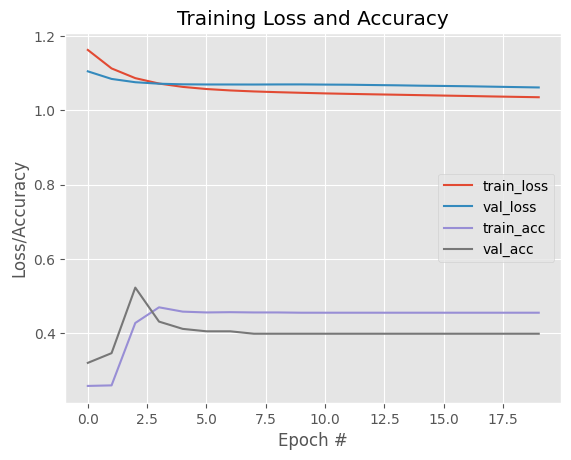

In [ ]:
import tensorflow as tf

activation_function = tf.nn.relu
learning_rate = 0.001
num_epochs = 20
batch_size = 128
train_neurona(activation_function, learning_rate, batch_size, num_epochs)

Vamos a bajarle el learning_rate

[INFO]: Entrenando red neuronal...
Epoch 1/20
11/11 [==============================] - 2s 101ms/step - loss: 1.0698 - accuracy: 0.4553 - val_loss: 1.0965 - val_accuracy: 0.3987
Epoch 2/20
11/11 [==============================] - 0s 6ms/step - loss: 1.0630 - accuracy: 0.4553 - val_loss: 1.0899 - val_accuracy: 0.3987
Epoch 3/20
11/11 [==============================] - 0s 8ms/step - loss: 1.0596 - accuracy: 0.4553 - val_loss: 1.0864 - val_accuracy: 0.3987
Epoch 4/20
11/11 [==============================] - 0s 6ms/step - loss: 1.0560 - accuracy: 0.4553 - val_loss: 1.0822 - val_accuracy: 0.3987
Epoch 5/20
11/11 [==============================] - 0s 6ms/step - loss: 1.0525 - accuracy: 0.4553 - val_loss: 1.0777 - val_accuracy: 0.3987
Epoch 6/20
11/11 [==============================] - 0s 8ms/step - loss: 1.0498 - accuracy: 0.4553 - val_loss: 1.0738 - val_accuracy: 0.3987
Epoch 7/20
11/11 [==============================] - 0s 7ms/step - loss: 1.0456 - accuracy: 0.4553 - val_loss: 1.0714 - val_

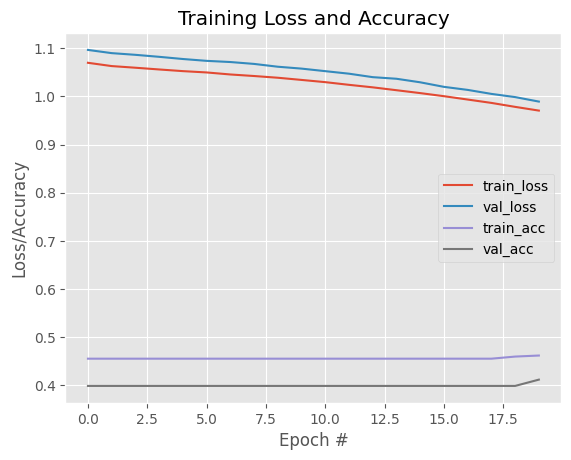

In [ ]:
import tensorflow as tf

activation_function = tf.nn.relu
learning_rate = 0.01
num_epochs = 20
batch_size = 128
train_neurona(activation_function, learning_rate, batch_size, num_epochs)

Vamos a bajarle el batch_size para ver si mejora aun mas

[INFO]: Entrenando red neuronal...
Epoch 1/20
43/43 [==============================] - 2s 32ms/step - loss: 1.0619 - accuracy: 0.4385 - val_loss: 1.0863 - val_accuracy: 0.3987
Epoch 2/20
43/43 [==============================] - 0s 6ms/step - loss: 1.0154 - accuracy: 0.4567 - val_loss: 1.0173 - val_accuracy: 0.3987
Epoch 3/20
43/43 [==============================] - 0s 6ms/step - loss: 0.9725 - accuracy: 0.4924 - val_loss: 0.9705 - val_accuracy: 0.4444
Epoch 4/20
43/43 [==============================] - 0s 7ms/step - loss: 0.9288 - accuracy: 0.5571 - val_loss: 0.9239 - val_accuracy: 0.6471
Epoch 5/20
43/43 [==============================] - 0s 7ms/step - loss: 0.8888 - accuracy: 0.6182 - val_loss: 0.8830 - val_accuracy: 0.6797
Epoch 6/20
43/43 [==============================] - 0s 6ms/step - loss: 0.8529 - accuracy: 0.6473 - val_loss: 0.8510 - val_accuracy: 0.6471
Epoch 7/20
43/43 [==============================] - 0s 6ms/step - loss: 0.8279 - accuracy: 0.6436 - val_loss: 0.8201 - val_a

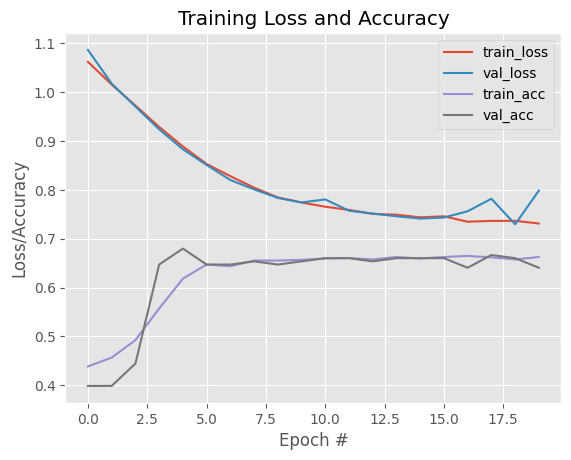

In [ ]:
import tensorflow as tf

activation_function = tf.nn.relu
learning_rate = 0.01
num_epochs = 20
batch_size = 32
train_neurona(activation_function, learning_rate, batch_size, num_epochs)

Vamos a subirle las epocas

[INFO]: Entrenando red neuronal...
Epoch 1/100
43/43 [==============================] - 2s 27ms/step - loss: 1.0599 - accuracy: 0.4560 - val_loss: 1.0659 - val_accuracy: 0.3987
Epoch 2/100
43/43 [==============================] - 0s 4ms/step - loss: 1.0228 - accuracy: 0.4560 - val_loss: 1.0317 - val_accuracy: 0.3987
Epoch 3/100
43/43 [==============================] - 0s 6ms/step - loss: 0.9827 - accuracy: 0.4749 - val_loss: 0.9881 - val_accuracy: 0.4444
Epoch 4/100
43/43 [==============================] - 0s 7ms/step - loss: 0.9429 - accuracy: 0.5455 - val_loss: 0.9452 - val_accuracy: 0.5817
Epoch 5/100
43/43 [==============================] - 0s 6ms/step - loss: 0.8994 - accuracy: 0.6335 - val_loss: 0.9131 - val_accuracy: 0.5882
Epoch 6/100
43/43 [==============================] - 0s 7ms/step - loss: 0.8571 - accuracy: 0.6451 - val_loss: 0.8790 - val_accuracy: 0.5882
Epoch 7/100
43/43 [==============================] - 0s 6ms/step - loss: 0.8203 - accuracy: 0.6473 - val_loss: 0.8125 

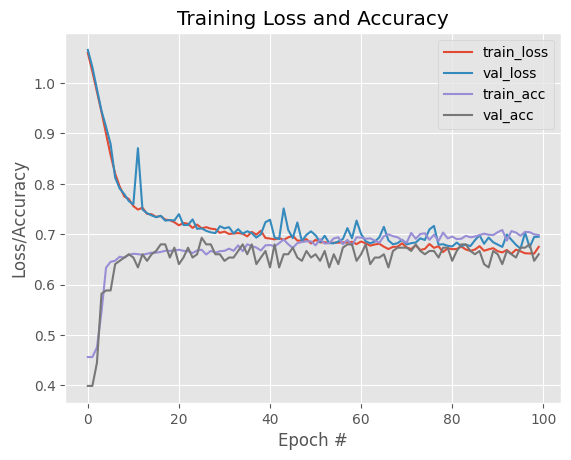

In [49]:
import tensorflow as tf

activation_function = tf.nn.relu
learning_rate = 0.01
num_epochs =100
batch_size = 32
# este va a ser el modelo elegido por lo que guardamos los datos en model_tabular
model_tabular = train_neurona(activation_function, learning_rate, batch_size, num_epochs)



In [18]:
from tensorflow.keras.models import load_model

# Guarda el modelo tabular
model_tabular.save('/content/drive/My Drive/DeepLearning/model_tabular.h5')

# Para cargar el modelo tabular
model_tabular = load_model('/content/drive/My Drive/DeepLearning/model_tabular.h5')



 # Hyper-opt
 Intentaremos encontrar la mejor optimizacion

In [1]:
 !pip install networkx==1.11
 !pip install hyperopt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 36.5 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.1
    Uninstalling networkx-3.1:
      Successfully uninstalled networkx-3.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
hyperopt 0.2.7 requires networkx>=2.2, but you have networkx 1.11 which is incompatible.
scikit-image 0.19.3 requires networkx>=2.2, but you have networkx 1.11 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 32.8 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 1.11
    Uninstalling networkx-1.11:
      Successfully uninstalled networkx-1.11


[INFO]: Entrenando red neuronal...
Epoch 1/20

43/43 [==============================] - 7s 26ms/step - loss: 1.0259 - accuracy: 0.4880 - val_loss: 1.1466 - val_accuracy: 0.4118

Epoch 2/20

43/43 [==============================] - 0s 5ms/step - loss: 0.8684 - accuracy: 0.6204 - val_loss: 0.7956 - val_accuracy: 0.6471

Epoch 3/20

43/43 [==============================] - 0s 5ms/step - loss: 0.7974 - accuracy: 0.6582 - val_loss: 0.8025 - val_accuracy: 0.6471

Epoch 4/20

43/43 [==============================] - 0s 5ms/step - loss: 0.7609 - accuracy: 0.6611 - val_loss: 0.7645 - val_accuracy: 0.6667

Epoch 5/20

43/43 [==============================] - 0s 4ms/step - loss: 0.7491 - accuracy: 0.6647 - val_loss: 0.8109 - val_accuracy: 0.6209

Epoch 6/20

43/43 [==============================] - 0s 5ms/step - loss: 0.7486 - accuracy: 0.6625 - val_loss: 0.7346 - val_accuracy: 0.6732

Epoch 7/20

43/43 [==============================] - 0s 5ms/step - loss: 0.7422 - accuracy: 0.6604 - val_loss: 0

Se han truncado las últimas 5000 líneas del flujo de salida.

43/43 [==============================] - 0s 6ms/step - loss: 1.0575 - accuracy: 0.4553 - val_loss: 1.0902 - val_accuracy: 0.3987

Epoch 13/20

43/43 [==============================] - 0s 6ms/step - loss: 1.0556 - accuracy: 0.4553 - val_loss: 1.0887 - val_accuracy: 0.3987

Epoch 14/20

43/43 [==============================] - 0s 7ms/step - loss: 1.0532 - accuracy: 0.4553 - val_loss: 1.0859 - val_accuracy: 0.3987

Epoch 15/20

43/43 [==============================] - 0s 6ms/step - loss: 1.0507 - accuracy: 0.4553 - val_loss: 1.0834 - val_accuracy: 0.3987

Epoch 16/20

43/43 [==============================] - 0s 7ms/step - loss: 1.0474 - accuracy: 0.4553 - val_loss: 1.0805 - val_accuracy: 0.3987

Epoch 17/20

43/43 [==============================] - 0s 6ms/step - loss: 1.0435 - accuracy: 0.4553 - val_loss: 1.0778 - val_accuracy: 0.3987

Epoch 18/20

43/43 [==============================] - 0s 6ms/step - loss: 1.0389 - accuracy: 

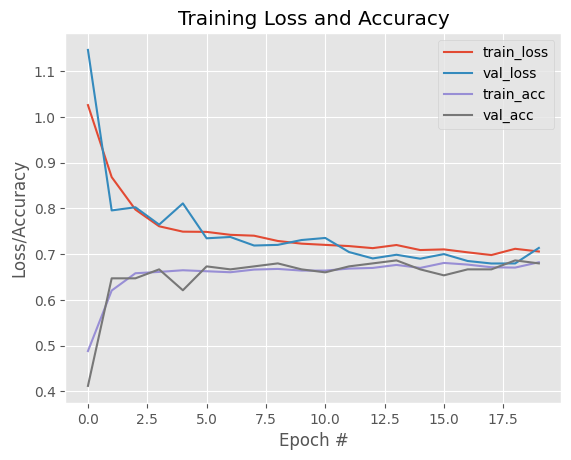

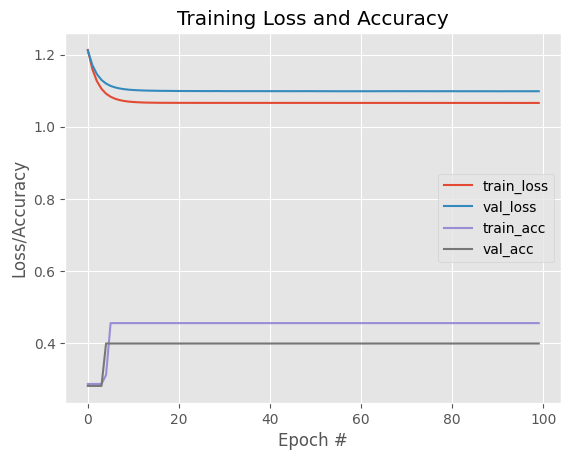

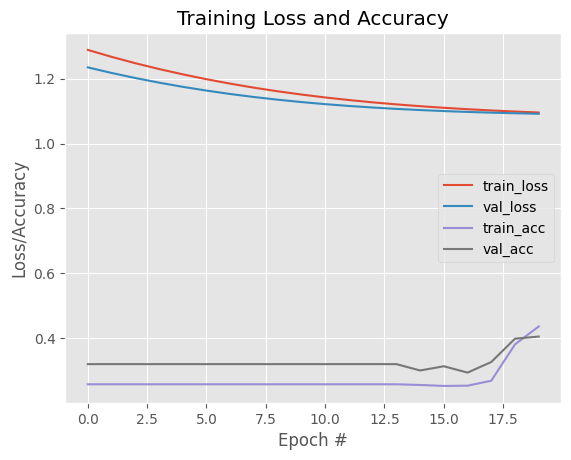

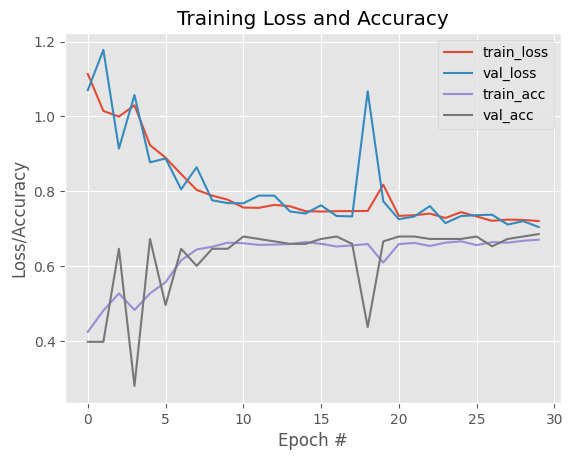

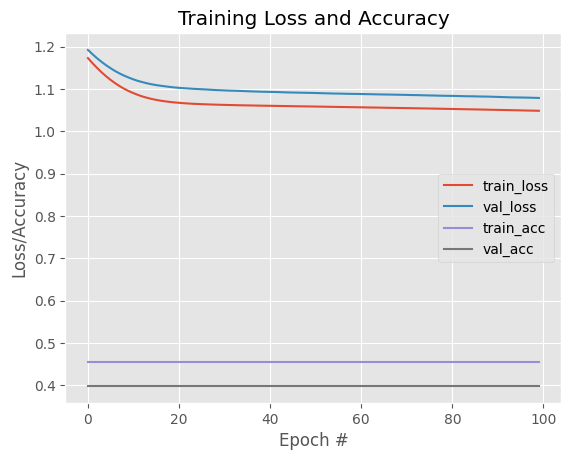

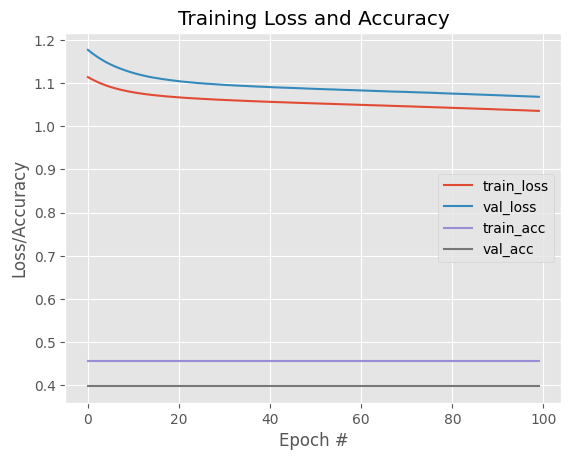

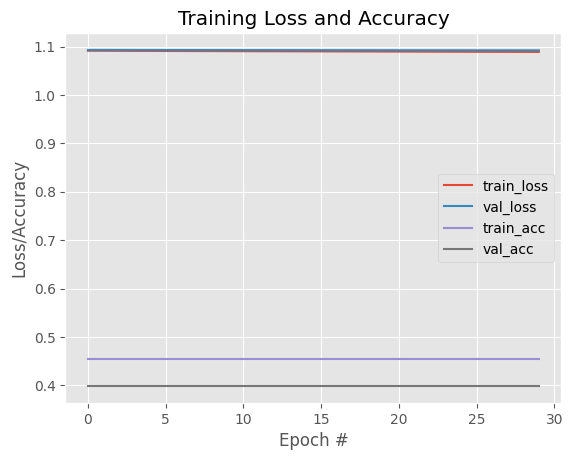

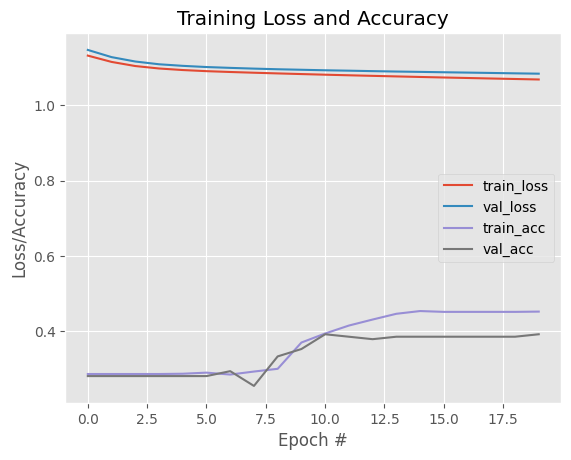

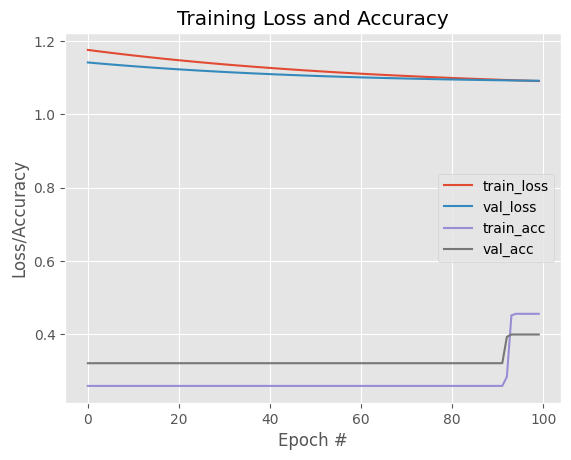

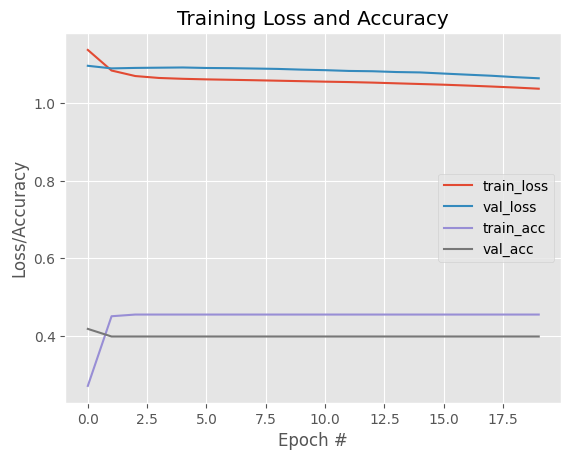

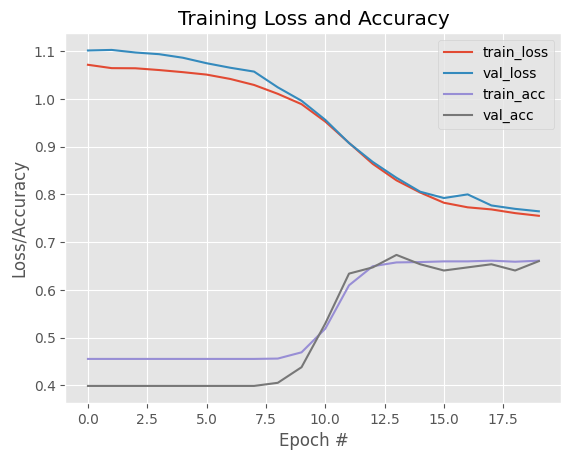

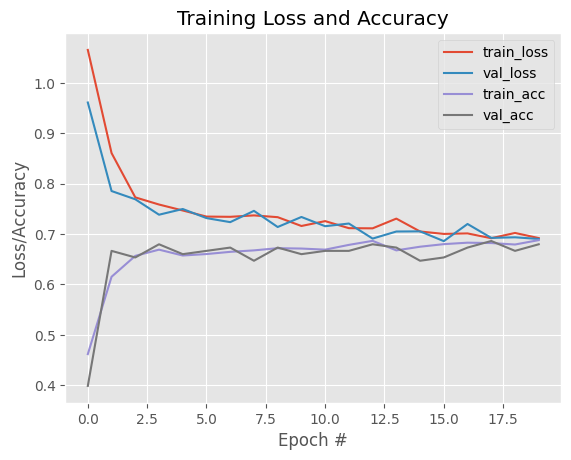

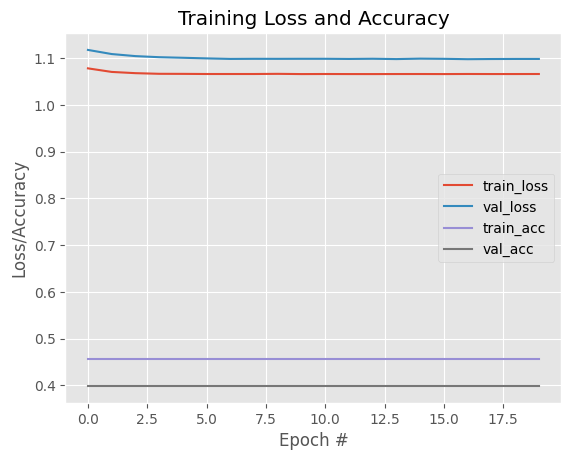

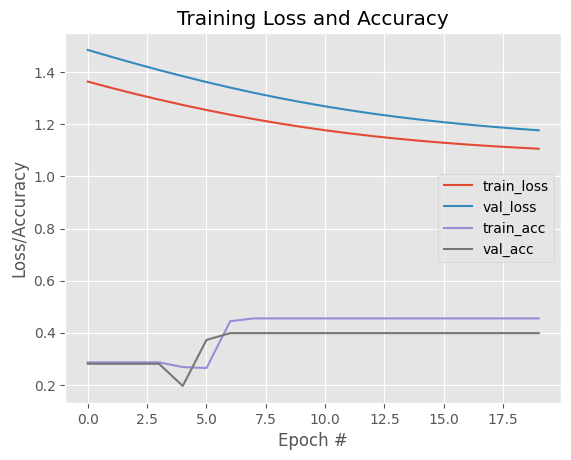

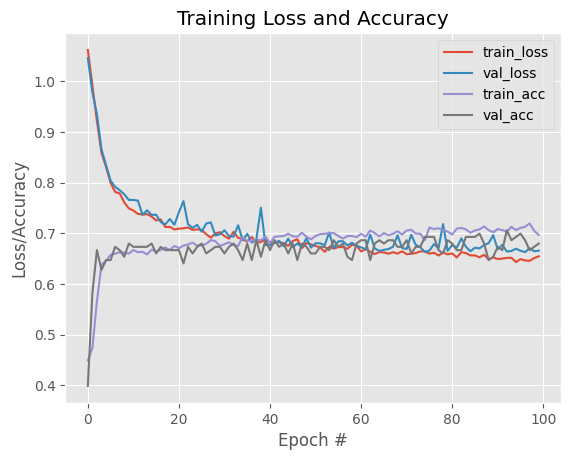

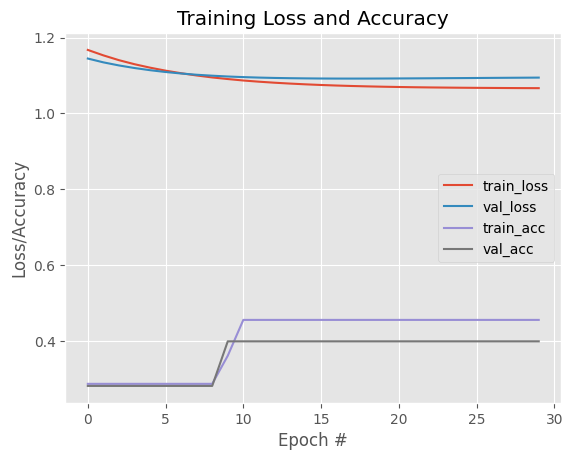

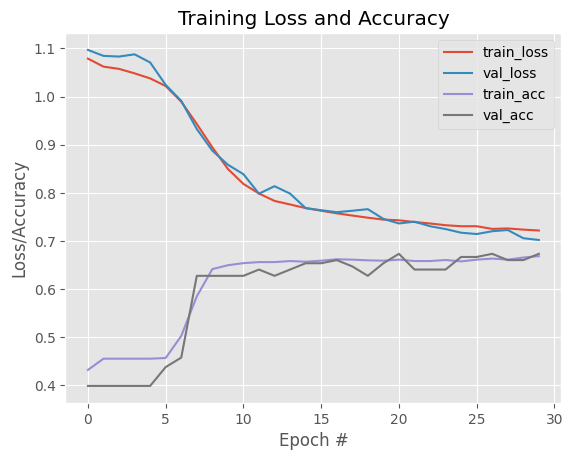

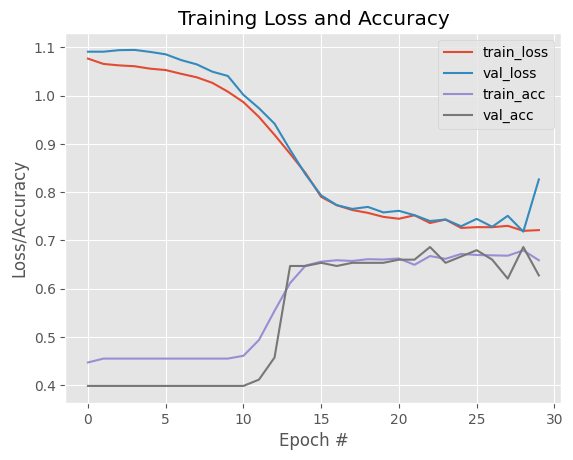

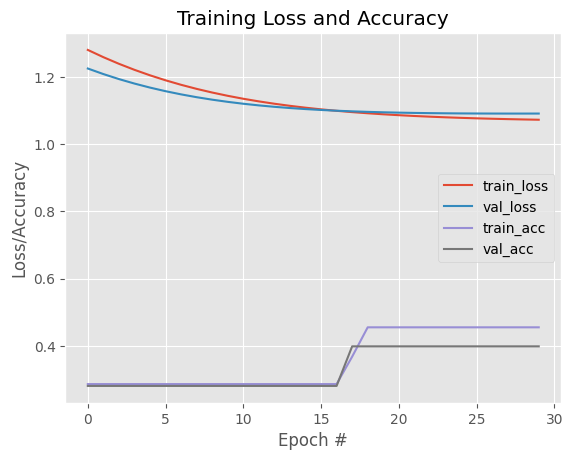

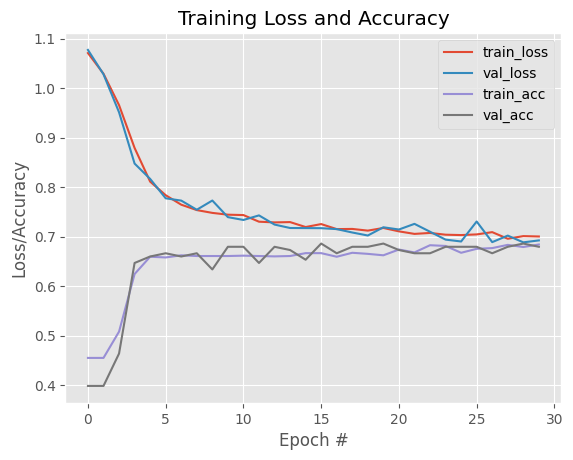

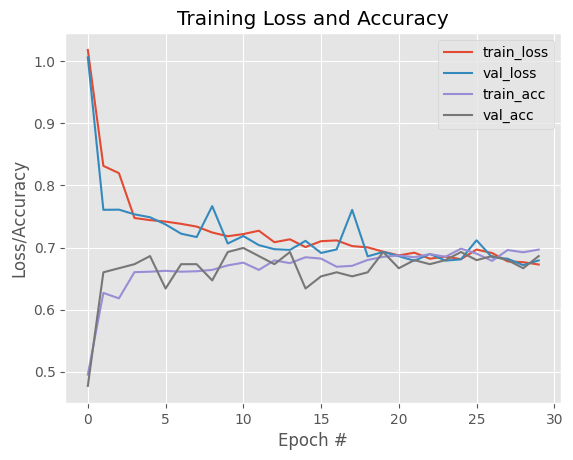

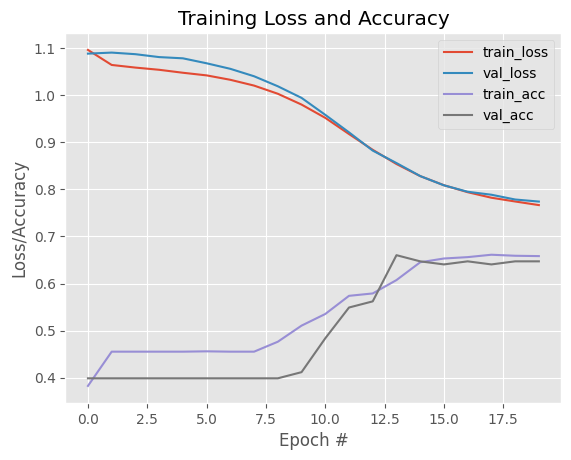

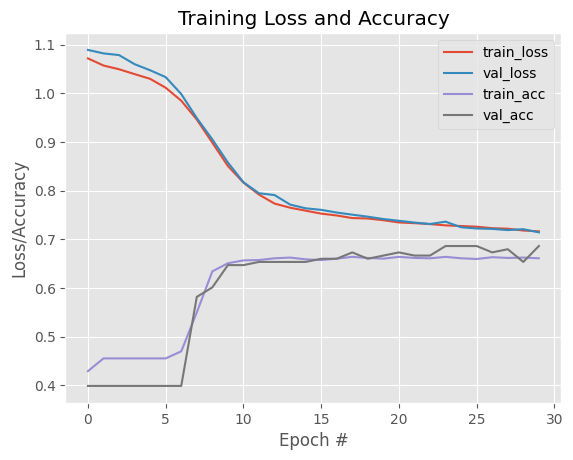

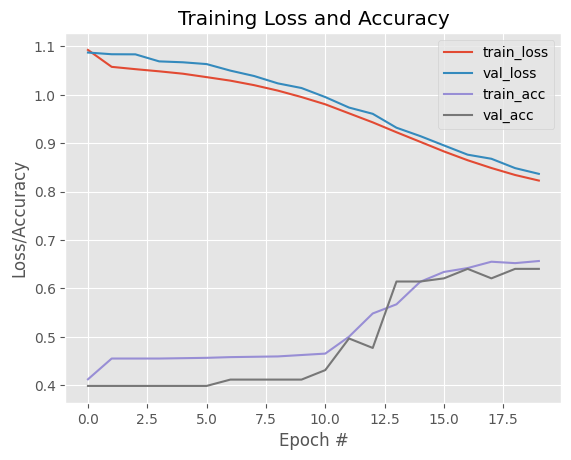

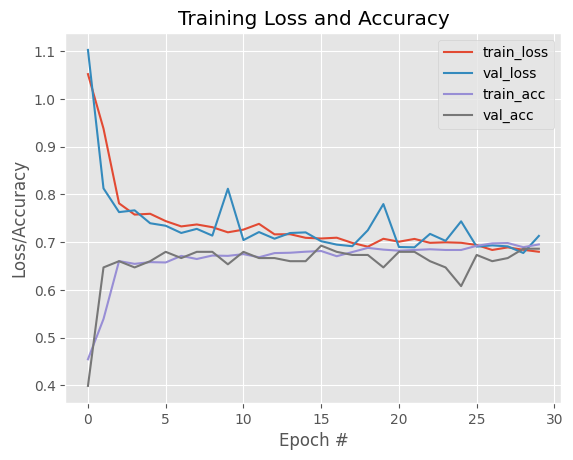

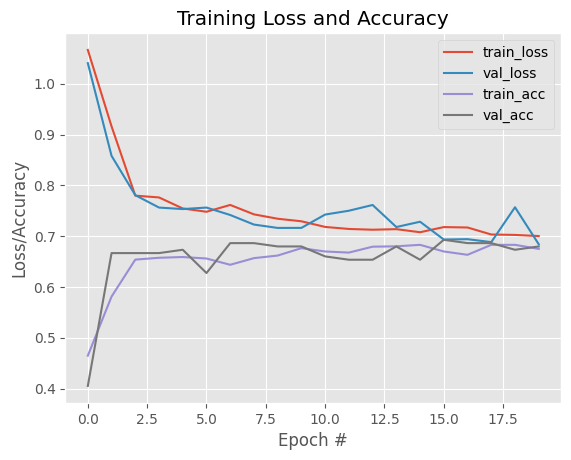

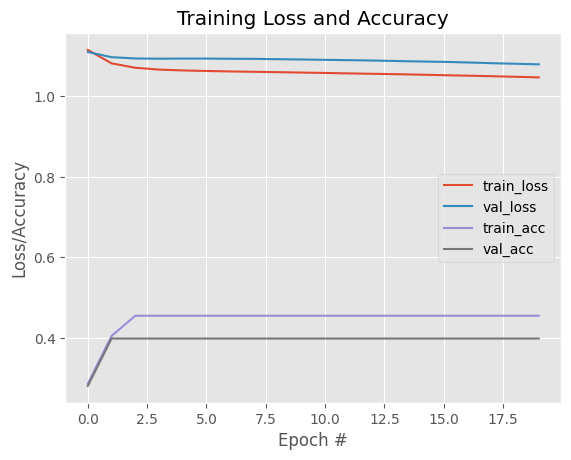

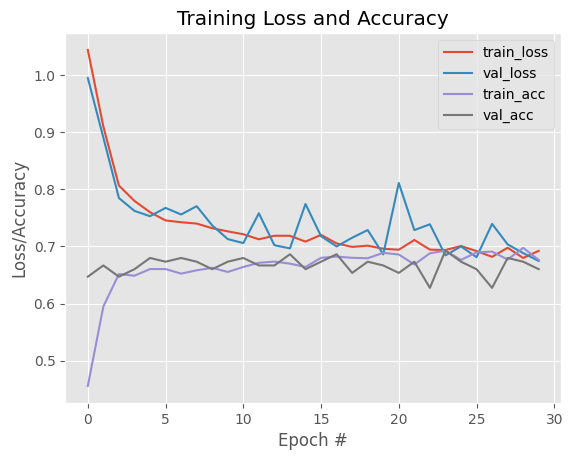

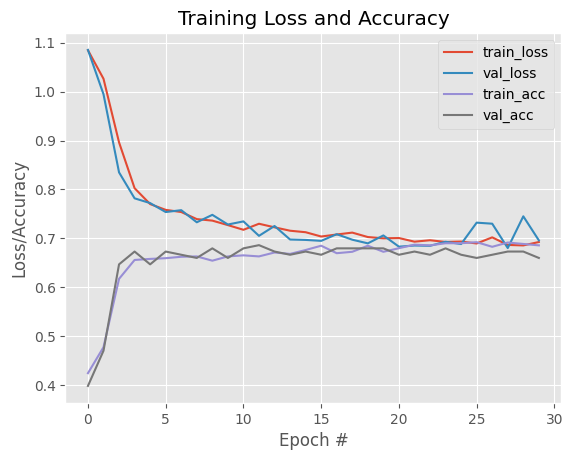

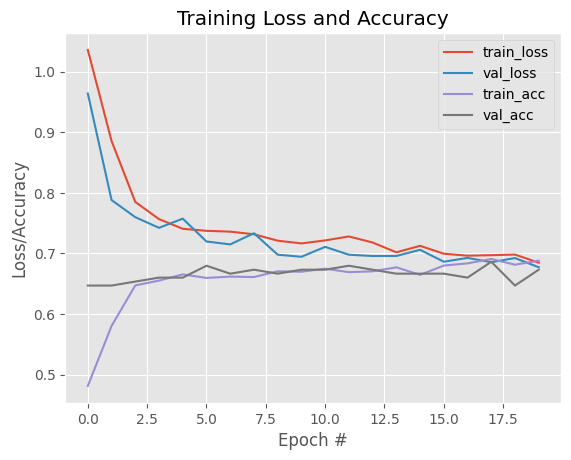

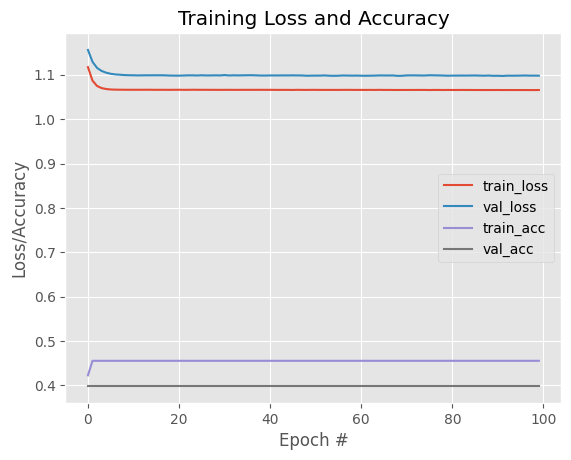

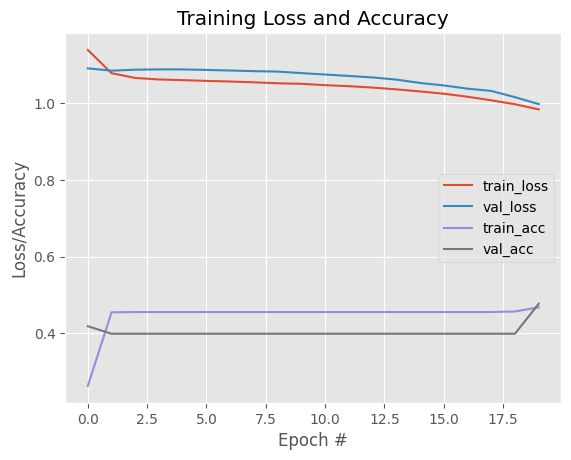

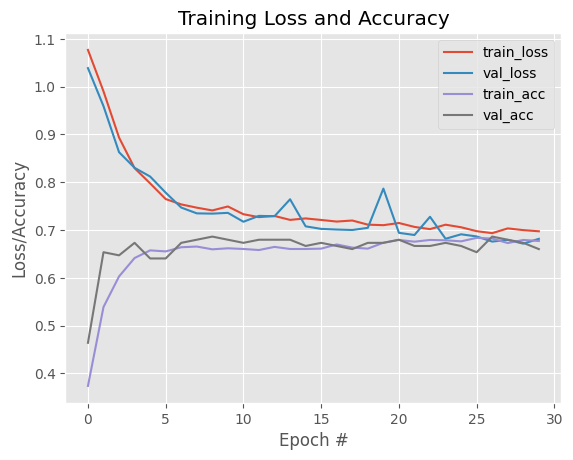

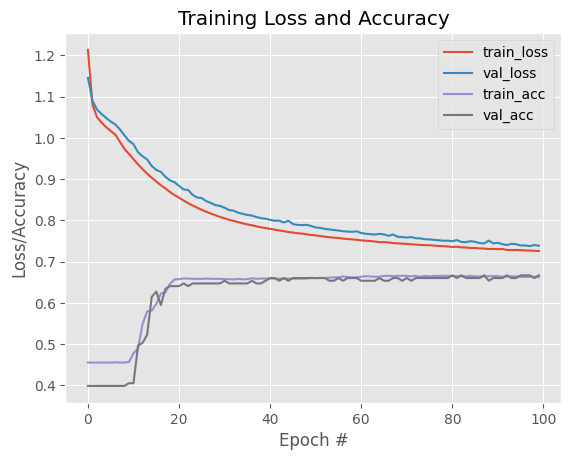

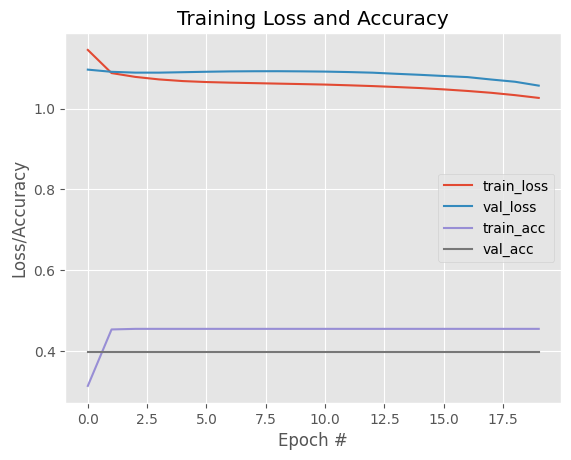

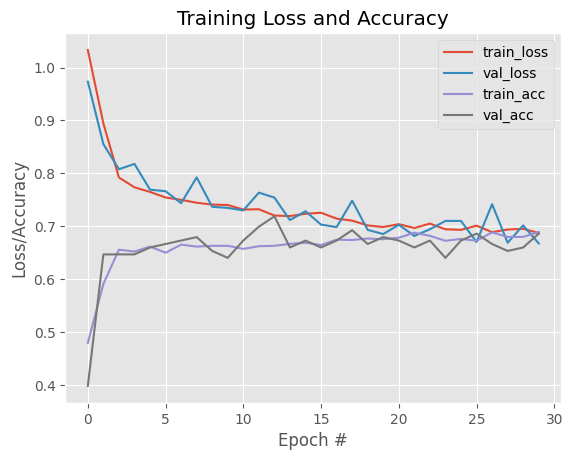

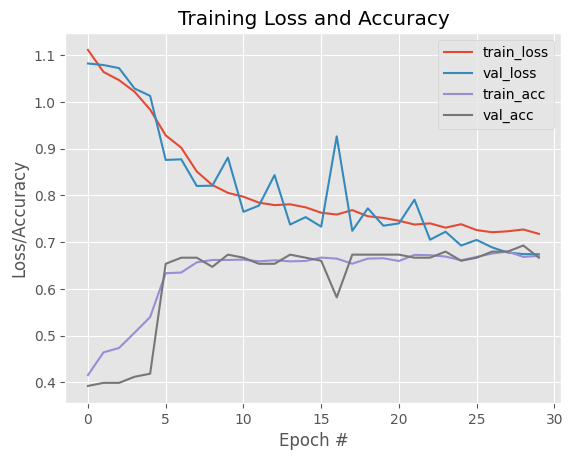

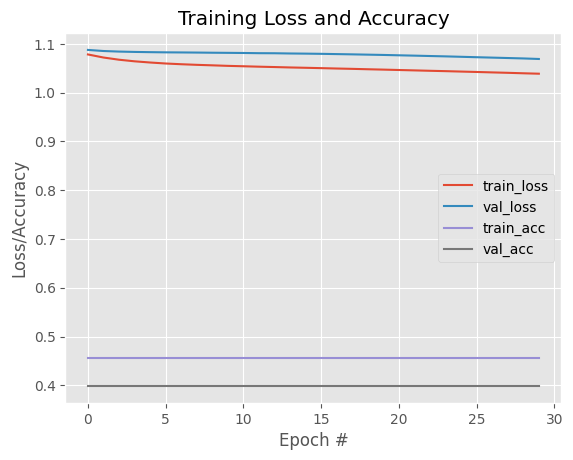

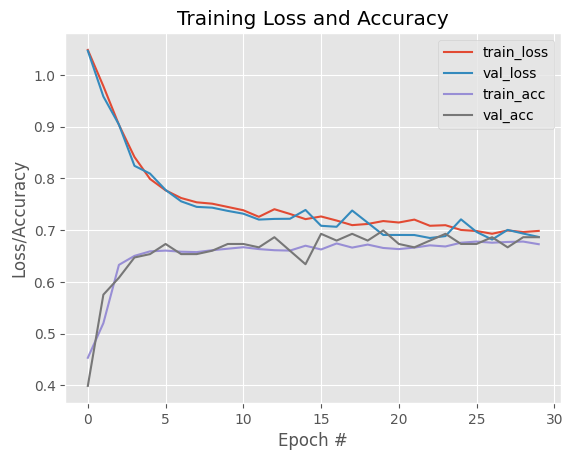

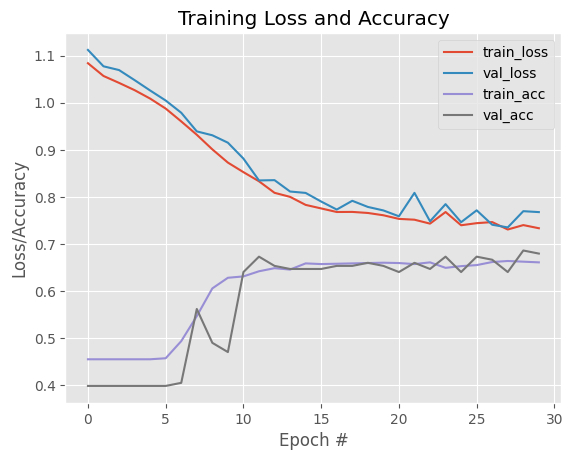

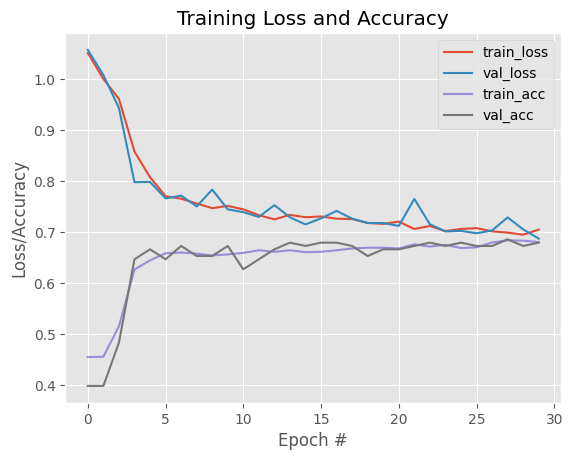

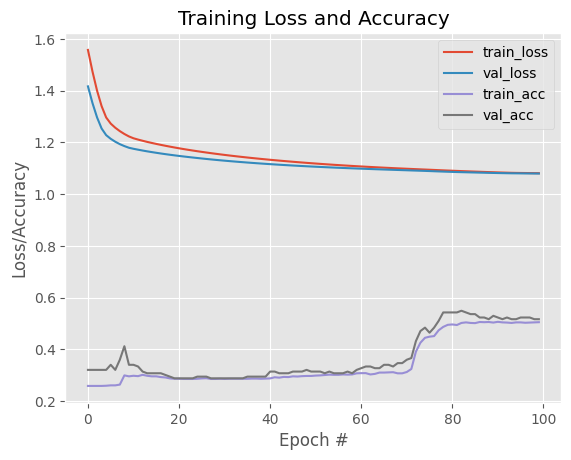

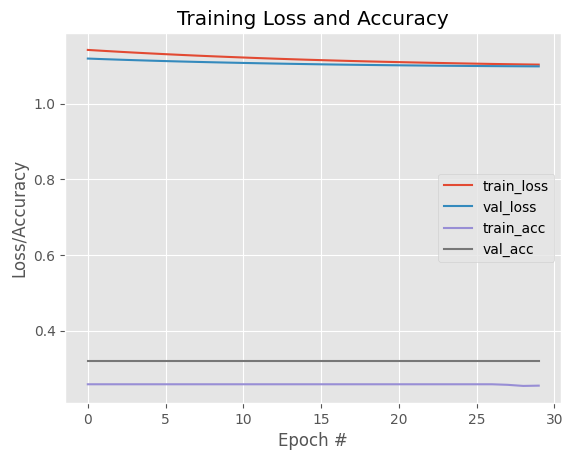

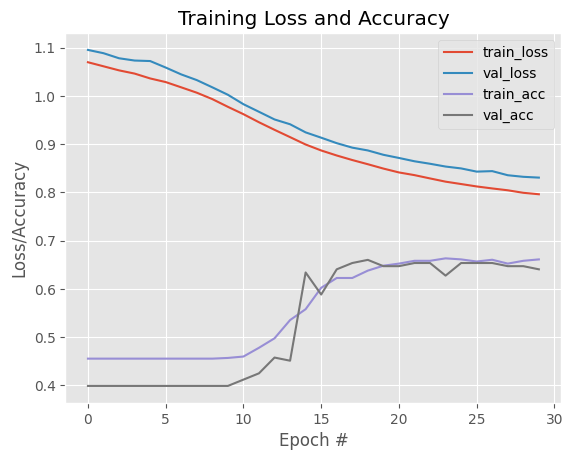

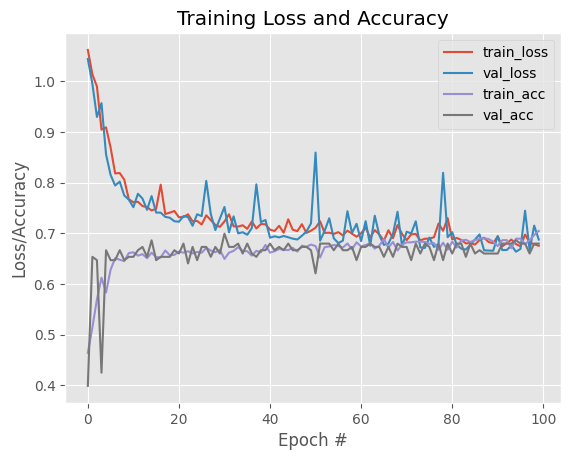

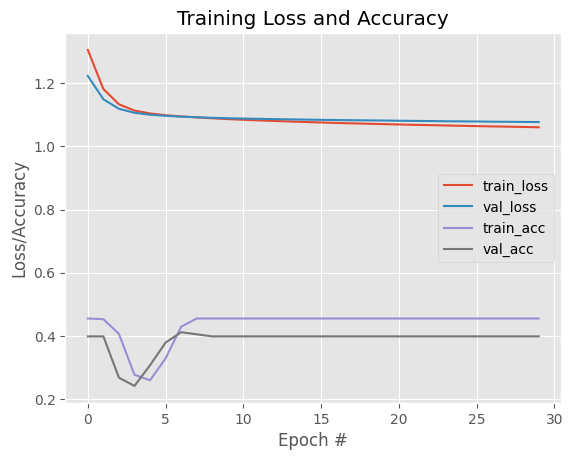

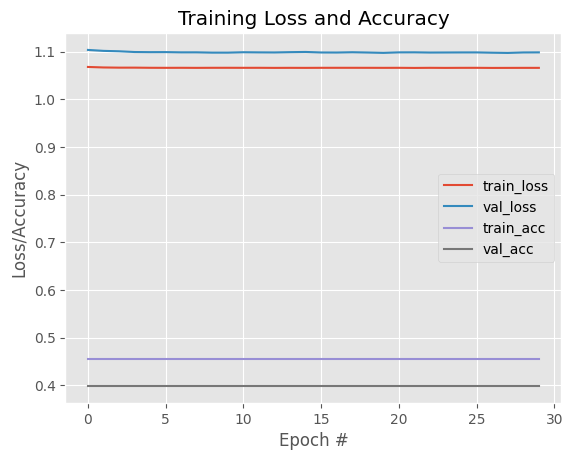

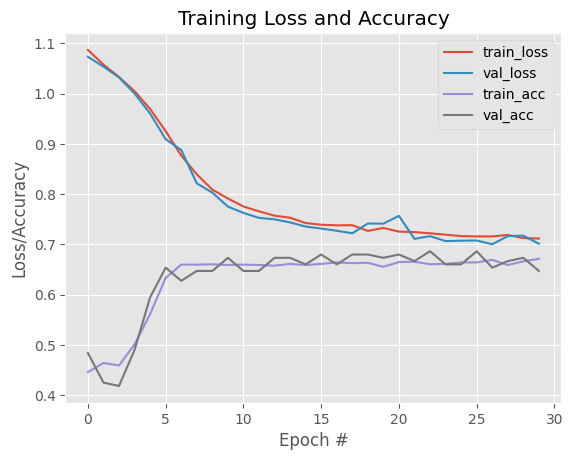

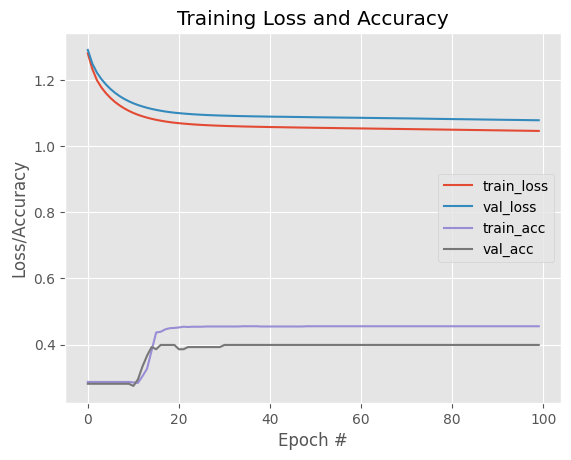

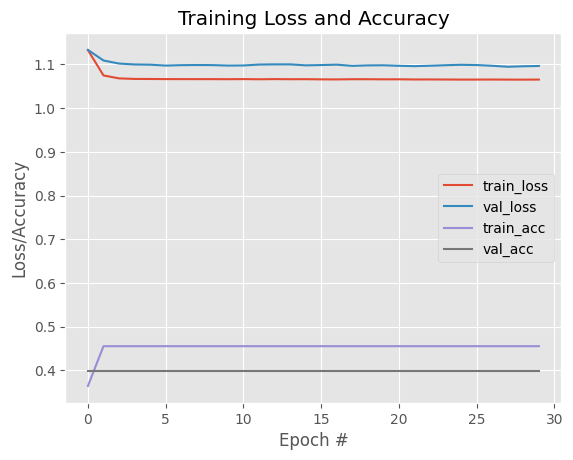

In [19]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

# Definimos el espacio de búsqueda para los hiperparámetros
space = {
    'activation_function': hp.choice('activation_function', ['relu', 'tanh', 'sigmoid']),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.0001), np.log(0.1)),
    'batch_size': hp.choice('batch_size', [32, 64, 128]),
    'num_epochs': hp.choice('num_epochs', [20, 30, 100])
}

def objective(params):
    # Train the model with the given parameters
    model = train_neurona(params['activation_function'], params['learning_rate'], params['batch_size'], params['num_epochs'])

    # Evaluate the model
    _, acc = model.evaluate(X_test_tab, y_test_tab, verbose=0)

    # We want to minimize loss, i.e., maximize accuracy
    return {'loss': -acc, 'status': STATUS_OK}

# Run the algorithm
trials = Trials()
best = fmin(objective, space, algo=tpe.suggest, max_evals=50, trials=trials)

print("Best parameters are: ", best)

# Imagenes
---
Primero vamos a cargar los datos desde el ultimo punto de guardado para tener bien los datos.

In [3]:
from keras.utils import to_categorical
import pandas as pd
import numpy as np

# Cargar los datos
full_df_complete = pd.read_csv('drive/MyDrive/DeepLearning/full_df_complete.csv', sep=';')
images = np.load("drive/MyDrive/DeepLearning//images.npy")
print(full_df_complete.shape)

# Preparamos la separación
y_final_data_full = full_df_complete["Price"]
X_final_data_full = images

# categorizamos y

y_final_data_full = []
for y in full_df_complete['Price']:
  if y <= 32:
    y_final_data_full.append(0) # Rango más barato
  elif 32 < y <= 55:
    y_final_data_full.append(1) # Rango intermedio
  else:
    y_final_data_full.append(2)
y_final_data_full = to_categorical(y_final_data_full, num_classes=3)

y_final_data_full = y_final_data_full.astype('float32')



print(y_final_data_full.shape)
print(X_final_data_full.shape)

(1910, 207)
(1910, 3)
(1910, 224, 224, 3)


In [4]:
# Obtener y preprocesar los datos
from sklearn.model_selection import train_test_split
# Dividimos el conjunto de training en training y test
X_train, X_test, y_train, y_test = train_test_split(X_final_data_full, y_final_data_full, test_size=0.2, random_state=42)
# Dividimos el conjunto de training en training y validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)


In [5]:
# Centramos los datos (le restamos la media)
X_train_mean = np.mean(X_train, axis=0)
X_train_cent = X_train - X_train_mean

# Normalizamos
X_train_std = np.std(X_train, axis=0)
X_train_norm = X_train_cent / X_train_std

X_test_norm = (X_test - X_train_mean) / X_train_std
X_val_norm = (X_val - X_train_mean) / X_train_std

In [6]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1375, 224, 224, 3)
y_train shape: (1375, 3)
X_val shape: (153, 224, 224, 3)
y_val shape: (153, 3)
X_test shape: (382, 224, 224, 3)
y_test shape: (382, 3)


Primero vamos a realizar un modelo desde cero con maxpooling y dropout

In [ ]:
import tensorflow as tf
import numpy as np
import keras
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

# Inicializamos el modelo
model = Sequential()

## Copiamos del anterior y añadimos maxPooling
# Definimos una capa convolucional
model.add(Conv2D(256, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Definimos una segunda capa convolucional
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Definimos una tercera capa convolucional
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Añadimos nuestro clasificador
model.add(Flatten())
model.add(Dense(50.176, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(3, activation='softmax'))

# Compilamos el modelo
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=100,
    decay_rate=0.96,
    staircase=True
)
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=lr_schedule),
              metrics=['accuracy'])

# Entrenamos el modelo
model.fit(X_train_norm, y_train,
          batch_size=64, # Si pongo 128 salta falta de memoria
          shuffle=True,
          epochs=10,
          validation_data=(X_val_norm, y_val))

# Evaluamos el modelo
scores = model.evaluate(X_test_norm, y_test)

print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])



Epoch 1/10
22/22 [==============================] - 50s 2s/step - loss: 1.6810 - accuracy: 0.4313 - val_loss: 1.0974 - val_accuracy: 0.3725
Epoch 2/10
22/22 [==============================] - 26s 1s/step - loss: 1.0482 - accuracy: 0.4604 - val_loss: 1.0812 - val_accuracy: 0.3987
Epoch 3/10
22/22 [==============================] - 26s 1s/step - loss: 1.0524 - accuracy: 0.4669 - val_loss: 1.0941 - val_accuracy: 0.3987
Epoch 4/10
22/22 [==============================] - 25s 1s/step - loss: 1.0366 - accuracy: 0.4640 - val_loss: 1.0739 - val_accuracy: 0.4314
Epoch 5/10
22/22 [==============================] - 25s 1s/step - loss: 1.0259 - accuracy: 0.4844 - val_loss: 1.0682 - val_accuracy: 0.4379
Epoch 6/10
22/22 [==============================] - 26s 1s/step - loss: 1.0277 - accuracy: 0.4756 - val_loss: 1.0743 - val_accuracy: 0.4314
Epoch 7/10
22/22 [==============================] - 25s 1s/step - loss: 1.0018 - accuracy: 0.5091 - val_loss: 1.0842 - val_accuracy: 0.4379
Epoch 8/10
22/22 [==

Ahora utilizaremos el strides a (2,2) en las convolucionales

In [ ]:
import tensorflow as tf
import numpy as np
import keras
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.layers import Dropout

# Inicializamos el modelo
model = Sequential()

## Copiamos del anteior y añadimos maxPooling
# Definimos una capa convolucional
model.add(Conv2D(256, kernel_size=(3, 3), strides=(2, 2), activation='relu', input_shape=(224, 224, 3)))

model.add(Dropout(0.25))

# Definimos una segunda capa convolucional
model.add(Conv2D(128, kernel_size=(3, 3), strides=(2, 2), activation='relu'))

model.add(Dropout(0.25))

# Definimos una tercera capa convolucional
model.add(Conv2D(64, kernel_size=(3, 3), strides=(2, 2), activation='relu'))

model.add(Dropout(0.25))


# Añadimos nuestro clasificador
model.add(Flatten())
model.add(Dense(850.176, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(3, activation='softmax'))

# Compilamos el modelo
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=100,
    decay_rate=0.96,
    staircase=True
)
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=lr_schedule),
              metrics=['accuracy'])

# Entrenamos el modelo
model.fit(X_train_norm, y_train,
          batch_size=64, # Si pongo 128 salta falta de memoria
          shuffle=True,
          epochs=10,
          validation_data=(X_val_norm, y_val))

# Evaluamos el modelo
scores = model.evaluate(X_test_norm, y_test)

print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])


Epoch 1/10
22/22 [==============================] - 15s 381ms/step - loss: 1.6677 - accuracy: 0.4175 - val_loss: 1.1315 - val_accuracy: 0.4118
Epoch 2/10
22/22 [==============================] - 6s 275ms/step - loss: 1.0592 - accuracy: 0.4691 - val_loss: 1.0822 - val_accuracy: 0.3987
Epoch 3/10
22/22 [==============================] - 6s 271ms/step - loss: 1.0578 - accuracy: 0.4553 - val_loss: 1.1033 - val_accuracy: 0.3987
Epoch 4/10
22/22 [==============================] - 6s 267ms/step - loss: 1.0488 - accuracy: 0.4800 - val_loss: 1.1154 - val_accuracy: 0.4575
Epoch 5/10
22/22 [==============================] - 6s 275ms/step - loss: 1.0210 - accuracy: 0.4960 - val_loss: 1.0893 - val_accuracy: 0.4118
Epoch 6/10
22/22 [==============================] - 6s 278ms/step - loss: 0.9894 - accuracy: 0.5069 - val_loss: 1.1149 - val_accuracy: 0.4052
Epoch 7/10
22/22 [==============================] - 6s 275ms/step - loss: 0.9323 - accuracy: 0.5658 - val_loss: 1.1518 - val_accuracy: 0.3987
Epoch

Ha salido peor

# Modelo con preentrenado

Como las imagenes son 224 X 224 vamos a utilizar  VGG16 y luego probaremos con RESNET50

# Probamos con VGG16

---


In [7]:
# primero cargamos nuestro dataset y lo redimensionamos a las dimensiones mínimas
# permitidas por la VGG16 -> (48, 48, 3)
# importamos lo necesario
from tensorflow.keras import callbacks
from tensorflow.keras import optimizers, Model
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np

input_shape = (224, 224, 3)
# Obtener y preprocesar los datos
from sklearn.model_selection import train_test_split
# Dividimos el conjunto de training en training y test
X_train, X_test, y_train, y_test = train_test_split(X_final_data_full, y_final_data_full, test_size=0.2, random_state=42)
# Dividimos el conjunto de training en training y validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
# Y_train = to_categorical(y_train) # ya estan categorizadas
# Y_test = to_categorical(y_test) # ya estan categorizadas

# resize train set
X_train_resized = []
for img in X_train:
  X_train_resized.append(np.resize(img, input_shape) / 255.)

X_train_resized = np.array(X_train_resized)
print(X_train_resized.shape)

# resize test set
X_test_resized = []
for img in X_test:
  X_test_resized.append(np.resize(img, input_shape) / 255.)

X_test_resized = np.array(X_test_resized)
print(X_test_resized.shape)

(1375, 224, 224, 3)
(382, 224, 224, 3)


In [8]:
# construimos el modelo base
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
base_model.summary()

58889256/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [9]:
# congelamos todas las capas de nuestro base_model para que no se entrenen
# queremos que nuestro feature extractor siga igual que antes => transfer learning
'''for layer in base_model.layers:
  layer.trainable = False
  print('Capa ' + layer.name + ' congelada.')

'''
for layer in base_model.layers:
  layer.trainable = False
  if layer.name in ['block5_conv3']: # Si meto la capa sigiente block5_conv2 se queda igual
    layer.trainable = True

# cogemos la última capa del model y le añadimos nuestro clasificador (top_model)
last = base_model.layers[-1].output
x = Flatten()(last)
x = Dense(1000, activation='relu', name='fc1')(x)
x = Dropout(0.3)(x)
x = Dense(3, activation='softmax', name='predictions')(x)
model = Model(base_model.input, x)

# compilamos el modelo
model.compile(optimizer=Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

# vemos la estructura del modelo
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [10]:
# comenzamos con el entrenamiento
epochs = 5
batch_size = 32

# como entrenariamos normalmente
model.fit(X_train_resized, y_train,
          batch_size=batch_size,
          validation_data=(X_test_resized, y_test),
          epochs=epochs)

Epoch 1/5
43/43 [==============================] - 36s 483ms/step - loss: 2.0163 - accuracy: 0.4036 - val_loss: 1.0866 - val_accuracy: 0.4110
Epoch 2/5
43/43 [==============================] - 8s 188ms/step - loss: 1.0782 - accuracy: 0.4545 - val_loss: 1.0926 - val_accuracy: 0.4110
Epoch 3/5
43/43 [==============================] - 8s 188ms/step - loss: 1.0811 - accuracy: 0.4356 - val_loss: 1.0924 - val_accuracy: 0.4110
Epoch 4/5
43/43 [==============================] - 8s 192ms/step - loss: 1.0697 - accuracy: 0.4553 - val_loss: 1.0867 - val_accuracy: 0.4110
Epoch 5/5
43/43 [==============================] - 8s 190ms/step - loss: 1.0745 - accuracy: 0.4531 - val_loss: 1.0868 - val_accuracy: 0.4110


In [11]:
# comprobamos el accuracy y el loss en el test set
scores = model.evaluate(X_test_resized, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

12/12 [==============================] - 2s 123ms/step - loss: 1.0868 - accuracy: 0.4110
Test loss: 1.08681321144104
Test accuracy: 0.4109947681427002


# Vamos a utilizar Data augmentation
Al tener un numero de imagenes limitada puede ser una buena opcion utilizar Data augmentation

In [ ]:
#  Data augmentation

# importamos lo necesario
import tensorflow as tf
from tensorflow.keras import callbacks,optimizers, Model
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np

# primero cargamos nuestro dataset y lo redimensionamos a las dimensiones mínimas

input_shape = (224, 224, 3)

X_train, X_test, y_train, y_test = train_test_split(images, y_final_data_full, test_size=0.2, random_state=42)
# Y_train = to_categorical(y_train) # ya estan categorizadas
# Y_test = to_categorical(y_test) # ya estan categorizadas

# resize train set
X_train_resized = []
for img in X_train:
  X_train_resized.append(np.resize(img, input_shape) / 255)

X_train_resized = np.array(X_train_resized)
print(X_train_resized.shape)

# resize test set
X_test_resized = []
for img in X_test:
  X_test_resized.append(np.resize(img, input_shape) / 255)

X_test_resized = np.array(X_test_resized)
print(X_test_resized.shape)

(1528, 224, 224, 3)
(382, 224, 224, 3)


In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

# data generators => hacemos data augmentation
print('Usando real-time data augmentation.')
# This will do preprocessing and realtime data augmentation:
datagen_train = ImageDataGenerator(
    rotation_range=15, # rotar de manera aleatoria imágenes en el rango [0º, 15º]
    width_shift_range=0.1, # desplazar la imagen horizontalmente un 10%
    height_shift_range=0.1, # idem en vertical
    zoom_range=0.1, # rango de zoom aleatorio
    horizontal_flip=True # flip imagenes en el ancho
)
datagen_train.fit(X_train_resized)

datagen_test = ImageDataGenerator()
datagen_test.fit(X_test_resized)

# permitimos que, además de la etapa de clasificación, se entrenen también el
# último bloque convolucional
for layer in base_model.layers:
  layer.trainable = False
  if layer.name == "block5_conv3":
    layer.trainable = True

# cogemos la última capa del model y le añadimos nuestro clasificador (top_model)
# cogemos la última capa del model y le añadimos nuestro clasificador (top_model)
last = base_model.layers[-1].output
x = Flatten()(last)
x = Dense(1000, activation='relu', name='fc1')(x)
x = Dropout(0.3)(x)
x = Dense(3, activation='softmax', name='predictions')(x)
model = Model(base_model.input, x)

# compilamos el modelo
model.compile(optimizer=Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

# vemos la nueva estructura del modelo
model.summary()

58889256/58889256 [==============================] - 2s 0us/step
Usando real-time data augmentation.
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                        

In [ ]:
X_train_resized.shape


(1528, 224, 224, 3)

In [ ]:
# comenzamos con el entrenamiento
epochs = 5
batch_size = 128 # a 256 saltaba memoria ram
train_steps_per_epoch = X_train_resized.shape[0] / batch_size
test_steps_per_epoch = X_test_resized.shape[0] / batch_size

# entrenamos con el datagenerator (nos permite aplicar transformaciones en tiempo real)
model.fit_generator(datagen_train.flow(X_train_resized, y_train, batch_size),
                    steps_per_epoch=train_steps_per_epoch,
                    epochs=epochs,
                    validation_data=datagen_test.flow(X_test_resized, y_test, batch_size=batch_size),
                    validation_steps=test_steps_per_epoch,
                    workers=8)

# comprobamos el accuracy y el loss en el test set
scores =  model.evaluate(X_test_resized, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Epoch 1/5
11/11 [==============================] - 78s 4s/step - loss: 3.6115 - accuracy: 0.3253 - val_loss: 1.0982 - val_accuracy: 0.4110
Epoch 2/5
11/11 [==============================] - 25s 1s/step - loss: 1.1191 - accuracy: 0.4005 - val_loss: 1.0880 - val_accuracy: 0.4110
Epoch 3/5
11/11 [==============================] - 25s 1s/step - loss: 1.0894 - accuracy: 0.3999 - val_loss: 1.1144 - val_accuracy: 0.4110
Epoch 4/5
11/11 [==============================] - 23s 1s/step - loss: 1.0848 - accuracy: 0.4411 - val_loss: 1.0862 - val_accuracy: 0.4110
Epoch 5/5
12/12 [==============================] - 11s 547ms/step - loss: 1.0901 - accuracy: 0.4110
Test loss: 1.0900676250457764
Test accuracy: 0.4109947681427002


No hay mucha mejora

# Probamos resnet

In [25]:
# primero cargamos nuestro dataset y lo redimensionamos a las dimensiones mínimas
# importamos lo necesario
from tensorflow.keras import callbacks
from tensorflow.keras import optimizers, Model
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np

input_shape = (224, 224, 3)

X_temp, X_test, y_temp, y_test = train_test_split(images, y_final_data_full, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1, random_state=42)


# resize train set
X_train_resized = []
for img in X_train:
  X_train_resized.append(np.resize(img, input_shape) / 255.)

X_train_resized = np.array(X_train_resized)
print(X_train_resized.shape)

# resize validation set
X_val_resized = []
for img in X_val:
  X_val_resized.append(np.resize(img, input_shape) / 255.)

X_val_resized = np.array(X_val_resized)
print(X_val_resized.shape)

# resize test set
X_test_resized = []
for img in X_test:
  X_test_resized.append(np.resize(img, input_shape) / 255.)

X_test_resized = np.array(X_test_resized)
print(X_test_resized.shape)

(1375, 224, 224, 3)
(153, 224, 224, 3)
(382, 224, 224, 3)


In [8]:
# creamos el modelo base
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=input_shape)
base_model.summary()

94765736/94765736 [==============================] - 3s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                          

In [9]:
# permitimos que, además de la etapa de clasificación, se entrenen también el
# último bloque convolucional
for layer in base_model.layers:
  layer.trainable = False
  if layer.name in ['conv5_block3_3_conv', 'conv5_block3_2_conv']: # si solo conectamos conv5_block3_3_conv no llega al 20%  y si pogo alguna mas no hay mejora
    layer.trainable = True

# cogemos la última capa del model y le añadimos nuestro clasificador (top_model)
last = base_model.layers[-1].output
x = Flatten()(last)
x = Dense(1000, activation='relu', name='fc1')(x)
x = Dropout(0.3)(x)
x = Dense(3, activation='softmax', name='predictions')(x)
model_image = Model(base_model.input, x)

# compilamos el modelo
model_image.compile(optimizer=Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

# vemos la nueva estructura del modelo
model_image.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [10]:
# comenzamos con el entrenamiento
epochs = 5
batch_size = 124

# como entrenariamos normalmente
model_image.fit(X_train_resized, y_train,
          batch_size=batch_size,
          validation_data=(X_test_resized, y_test),
          epochs=epochs)

Epoch 1/5
12/12 [==============================] - 33s 1s/step - loss: 5.1072 - accuracy: 0.3898 - val_loss: 1.1768 - val_accuracy: 0.4110
Epoch 2/5
12/12 [==============================] - 6s 505ms/step - loss: 1.1162 - accuracy: 0.4196 - val_loss: 1.0867 - val_accuracy: 0.4110
Epoch 3/5
12/12 [==============================] - 6s 509ms/step - loss: 1.0798 - accuracy: 0.4553 - val_loss: 1.2060 - val_accuracy: 0.4110
Epoch 4/5
12/12 [==============================] - 7s 628ms/step - loss: 1.0883 - accuracy: 0.4553 - val_loss: 1.0882 - val_accuracy: 0.4110
Epoch 5/5
12/12 [==============================] - 8s 660ms/step - loss: 1.1451 - accuracy: 0.4378 - val_loss: 1.0945 - val_accuracy: 0.4110


In [11]:
# comprobamos el accuracy y el loss en el test set
scores = model_image.evaluate(X_test_resized, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

12/12 [==============================] - 4s 204ms/step - loss: 1.0945 - accuracy: 0.4110
Test loss: 1.0945035219192505
Test accuracy: 0.4109947681427002


In [23]:
from tensorflow.keras.models import load_model

# Guarda el modelo entero
model_image.save('/content/drive/My Drive/DeepLearning/model_image.h5')

# Para cargar el modelo
model_image = load_model('/content/drive/My Drive/DeepLearning/model_image.h5')

Obtenemos el miemo resultado

# Hibridos
---
Vamos a realizar la union de los modelos de dos formas:

Early-Fusion:
Aquí,  tomanos las representaciones aprendidas de las imágenes de Resnet50 y los datos tabulares y combinándolas en un solo vector, que luego puedes pasar a una red densa para la clasificación final.


In [30]:
import tensorflow as tf
from tensorflow.keras import callbacks,optimizers, Model
from tensorflow.keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np

# Early-fusion
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
for layer in base_model.layers:
  layer.trainable = False

# Añadimos una capa GlobalAveragePooling para obtener un vector de características
x = base_model.output
x = GlobalAveragePooling2D()(x)
model_image = Model(inputs=base_model.input, outputs=x)

# Usamos este modelo para extraer características de las imagenes
features_train = model_image.predict(X_train_resized)
features_val = model_image.predict(X_val_resized)
features_test = model_image.predict(X_test_resized)

np.save('drive/MyDrive/DeepLearning/features_train.npy', features_train)
np.save('drive/MyDrive/DeepLearning/features_val.npy', features_val)
np.save('drive/MyDrive/DeepLearning/features_test.npy', features_test)
'''
features_train = np.load('drive/MyDrive/DeepLearning/features_train.npy')
features_val = np.load('drive/MyDrive/DeepLearning/features_val.npy')
features_test = np.load('drive/MyDrive/DeepLearning/features_test.npy')'''


# Luego, concatenamos estas características con los datos tabulares
X_train_combined = np.concatenate((X_train_tab, features_train), axis=1)
X_val_combined = np.concatenate((X_val_tab, features_val), axis=1)
X_test_combined = np.concatenate((X_test_tab, features_test), axis=1)


np.save('drive/MyDrive/DeepLearning/X_train_combined.npy', X_train_combined)
np.save('drive/MyDrive/DeepLearning/X_val_combined.npy', X_val_combined)
np.save('drive/MyDrive/DeepLearning/X_test_combined.npy', X_test_combined)
'''
X_train_combined = np.load('drive/MyDrive/DeepLearning/X_train_combined.npy')
X_val_combined = np.load('drive/MyDrive/DeepLearning/X_val_combined.npy')
X_test_combined = np.load('drive/MyDrive/DeepLearning/X_test_combined.npy')'''



12/12 [==============================] - 1s 95ms/step


"\nX_train_combined = np.load('drive/MyDrive/DeepLearning/X_train_combined.npy')\nX_val_combined = np.load('drive/MyDrive/DeepLearning/X_val_combined.npy')\nX_test_combined = np.load('drive/MyDrive/DeepLearning/X_test_combined.npy')"

In [31]:
# Alimentar estos datos combinados a la red neuronal
model_combined = Sequential()
model_combined.add(Dense(1000, activation='relu'))
model_combined.add(Dense(256, activation='relu'))
model_combined.add(Dense(124, activation='relu'))
model_combined.add(Dense(3, activation='softmax'))

model_combined.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])
model_combined.fit(X_train_combined, y_train_tab, validation_data=(X_val_combined, y_val_tab), epochs=num_epochs, batch_size=batch_size)

Epoch 1/100
12/12 [==============================] - 4s 24ms/step - loss: 1.2412 - accuracy: 0.4022 - val_loss: 1.1373 - val_accuracy: 0.2810
Epoch 2/100
12/12 [==============================] - 0s 8ms/step - loss: 1.0749 - accuracy: 0.4182 - val_loss: 1.0556 - val_accuracy: 0.3987
Epoch 3/100
12/12 [==============================] - 0s 8ms/step - loss: 1.0312 - accuracy: 0.4625 - val_loss: 1.0223 - val_accuracy: 0.4314
Epoch 4/100
12/12 [==============================] - 0s 8ms/step - loss: 1.0029 - accuracy: 0.5367 - val_loss: 1.0043 - val_accuracy: 0.4118
Epoch 5/100
12/12 [==============================] - 0s 11ms/step - loss: 0.9347 - accuracy: 0.5607 - val_loss: 0.9307 - val_accuracy: 0.6405
Epoch 6/100
12/12 [==============================] - 0s 8ms/step - loss: 0.8676 - accuracy: 0.6036 - val_loss: 0.8460 - val_accuracy: 0.6993
Epoch 7/100
12/12 [==============================] - 0s 13ms/step - loss: 0.7942 - accuracy: 0.6480 - val_loss: 0.8096 - val_accuracy: 0.6078
Epoch 8/10

In [32]:
# comprobamos el accuracy y el loss en el test set
scores = model_combined.evaluate(X_test_combined, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

12/12 [==============================] - 0s 3ms/step - loss: 0.7879 - accuracy: 0.6361
Test loss: 0.7879294157028198
Test accuracy: 0.6361256837844849


Late-Fusion:
En esta estrategia, estarías entrenando los dos modelos de manera independiente y luego usarías las predicciones de ambos como la entrada a otro modelo que tomaría la decisión final.

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Primero obtenemos las predicciones de los modelos anteriores como hemos hecho anteriormente
predictions_tabular_train = model_tabular.predict(X_train_tab)
predictions_image_train = model_image.predict(X_train_resized)
predictions_combined_train = np.concatenate((predictions_tabular_train, predictions_image_train), axis=1)

predictions_tabular_test = model_tabular.predict(X_test_tab)
predictions_image_test = model_image.predict(X_test_resized)
predictions_combined_test = np.concatenate((predictions_tabular_test, predictions_image_test), axis=1)


12/12 [==============================] - 2s 205ms/step


In [27]:
# vamos a utilizar una red neuronal
model_fusion = Sequential()
model_fusion.add(Dense(32, input_dim=predictions_combined_train.shape[1], activation='relu'))
model_fusion.add(Dense(3, activation='softmax'))  # El número 3 debería ser el número de categorías que tienes

model_fusion.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [28]:
# Ahora podemos entrenar el modelo fusionado con las etiquetas one-hot encoded
model_fusion.fit(predictions_combined_train, y_train, epochs=50, batch_size=32)

# Y evaluamos el rendimiento del modelo en los datos de prueba
_, accuracy = model_fusion.evaluate(predictions_combined_test, y_test)
print('Test accuracy:', accuracy)

Epoch 1/50
43/43 [==============================] - 3s 3ms/step - loss: 1.0576 - accuracy: 0.3935
Epoch 2/50
43/43 [==============================] - 0s 3ms/step - loss: 0.9454 - accuracy: 0.5455
Epoch 3/50
43/43 [==============================] - 0s 3ms/step - loss: 0.8657 - accuracy: 0.6669
Epoch 4/50
43/43 [==============================] - 0s 3ms/step - loss: 0.8031 - accuracy: 0.6807
Epoch 5/50
43/43 [==============================] - 0s 3ms/step - loss: 0.7566 - accuracy: 0.6873
Epoch 6/50
43/43 [==============================] - 0s 3ms/step - loss: 0.7212 - accuracy: 0.7069
Epoch 7/50
43/43 [==============================] - 0s 3ms/step - loss: 0.6986 - accuracy: 0.7025
Epoch 8/50
43/43 [==============================] - 0s 3ms/step - loss: 0.6846 - accuracy: 0.7084
Epoch 9/50
43/43 [==============================] - 0s 3ms/step - loss: 0.6747 - accuracy: 0.7091
Epoch 10/50
43/43 [==============================] - 0s 3ms/step - loss: 0.6688 - accuracy: 0.7055
Epoch 11/50
43/43 [

# Conclusiones
Despues de muchas luchas con colab he finalizado la practica.
En un primer lugar se ha realizado una limpieza del archivo csv segun el analisis realizado con anterioridad en la practica de machine learning.

En primer lugar aplique datos tabulares(1D) a una red neuronal y realice varias modificaciones segun los resultados y finalicebuscando la mejor optimizacion usando Hyper-opt.
Parece ser que hay algun problema con Hyper-opt y no resuelve bien los parametros por lo que escogi el mejor resultado que obtuve 0.64  de accuracy guardandolo en model_tabular.

Para la realizacion de la red neuronal utilizando imagenes, utilice una red neuronal desde cero con maxpooling y dropout.
Luego utilice strides por si mejoraba, no fue el caso. Teniendo un resultado del 0.4

Para mejorar el modelo se decidio utilizar un modelo preentrenado. Se hicieron varias pruebas con modelos que admitieran las dimensiones de las imagenes 224 X 224. La  primera eleccion fue VGG16, donde en una segunda version se le aplico data augmentation para intentar mejorar los datos ya que se disponen  de pocas imagenes para el modelo.  Para finalizar se utilizo RESNET50 con el mismo resultado un accuracy de 0.41.

Finalice realizando las dos fusiones
+ Early-Fusion: Donde cogemos las representaciones aprendidas de las imágenes de Resnet50 y los datos tabulares y combinándolas en un solo vector, que luego puedes pasar a una red densa para la clasificación final.

+ Late-Fusion: En esta estrategia, se entrenan los dos modelos de manera independiente y luego usarías las predicciones de ambos como la entrada a otro modelo que tomaría la decisión final.

Obteniendo como mejor resultado el Late-Fusion con un 0.64
Posiblemente si se utilizara todas las imagenes que hay en el dataset el resultado seria muchuimo mejor.